In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyflux as pf
from math import floor
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm, boxcox
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, explained_variance_score, mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [4]:
import statsmodels.api as sm

## Data Analysis and Province Selection

In [20]:
weather = pd.read_csv('weatherAUS.csv')
weather.shape

(145460, 23)

In [13]:
cities = pd.read_csv('AUS_cities_and_provinces.csv')
cities[:5]

Location            Province
0      Darwin  Northern Territory
1  Palmerston  Northern Territory
2    Brisbane          Queensland
3   Bundaberg          Queensland
4  Caboolture          Queensland

In [19]:
data = weather.merge(cities, left_on='Location', right_on='Location', how='left')
data.shape

(145460, 24)

In [29]:
data['Province'].value_counts(dropna=False)

NaN                   89581
Victoria              15291
New South Wales       12463
Queensland             9273
Western Australia      6233
Tasmania               6233
South Australia        3193
Northern Territory     3193
Name: Province, dtype: int64

In [33]:
data[data['Province'].isnull()].groupby(['Location']).count()

Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
Location                                                                    
AliceSprings      3040     3039     3038      3032         2825      2520   
BadgerysCreek     3009     2973     2980      2928            0         0   
Canberra          3436     3430     3433      3418         1832      1521   
Cobar             3009     3003     3006      2988         2666       550   
CoffsHarbour      3009     2994     2990      2953         1785      1494   
Dartmoor          3009     2940     2946      2942         2600      2566   
GoldCoast         3040     3037     3033      2980            0         0   
Katherine         1578     1529     1538      1560         1485         0   
MelbourneAirport  3009     3009     3009      3009         3006      3008   
Moree             3009     3007     3009      2854         2292      2055   
MountGambier      3040     3038     3035      3031         2630      2597   
MountGinini       3040     2949     2987      2907            0         0   
Nhil              1578     1573     1572      1569            0         0   
NorahHead         3004     2974     2974      2929            0         0   
NorfolkIsland     3009     3008     3008      2964         2775      2570   
Nuriootpa         3009     2998     3000      3003         2887      2848   
PearceRAAF        3009     2987     2988      2762            0      3004   
Penrith           3039     3011     3014      2964            0         0   
PerthAirport      3009     3009     3009      3009         3008      3004   
Portland          3009     3000     3008      2996         2600      2566   
Richmond          3009     2989     2995      2951         1624         0   
SalmonGums        3001     2960     2961      2955            0         0   
SydneyAirport     3009     3008     3009      3005         2963      2993   
Tuggeranong       3039     3038     3035      2998            0         0   
Uluru             1578     1543     1571      1522            0         0   
WaggaWagga        3009     3009     3009      2976         2871      2575   
Walpole           3006     2971     2967      2819            0         0   
Watsonia          3009     3002     3009      2999         3006      3008   
Williamtown       3009     3007     3006      2553         1946      1355   
Witchcliffe       3009     3000     3003      2952            0         0   
Woomera           3009     3005     3006      2991         2570      2007   

                  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  \
Location                                                              ...   
AliceSprings             2989           2989        2810        3036  ...   
BadgerysCreek            2933           2933        2574        2924  ...   
Canberra                 3097           3099        2895        3208  ...   
Cobar                    2967           2967        2982        2994  ...   
CoffsHarbour             2650           2650        2662        2706  ...   
Dartmoor                 2940           2940        2441        2911  ...   
GoldCoast                2920           2920        2975        3005  ...   
Katherine                1549           1549        1538        1560  ...   
MelbourneAirport         2994           2994        2969        2996  ...   
Moree                    2931           2932        2901        2954  ...   
MountGambier             2987           2988        2956        3022  ...   
MountGinini              2721           2721        2790        2808  ...   
Nhil                     1567           1567        1528        1573  ...   
NorahHead                2950           2950        2897        2956  ...   
NorfolkIsland            2964           2965        2978        3004  ...   
Nuriootpa                2960           2975        2865        2975  ...   
PearceRAAF               2864           2864        2918        2982  ...   
Penrith      

In [36]:
cities_full = pd.read_csv('AUS_cities_and_provinces_full.csv')
data = weather.merge(cities_full, left_on='Location', right_on='Location', how='left')
data['Province'].value_counts(dropna=False)

New South Wales       49084
Victoria              31914
Western Australia     21267
Queensland            12313
South Australia       12251
Northern Territory     9389
Tasmania               6233
External Territory     3009
Name: Province, dtype: int64

In [62]:
cities_full.groupby(['Province']).count()

Location
Province                    
External Territory         1
New South Wales           57
Northern Territory         5
Queensland                24
South Australia           13
Tasmania                   4
Victoria                  26
Western Australia         28

In [56]:
data.to_csv('weatherAUSwithstate.csv')

In [58]:
data['Cloud9am'].value_counts(dropna=False)

NaN    55888
7.0    19972
1.0    15687
8.0    14697
0.0     8642
6.0     8171
2.0     6500
3.0     5914
5.0     5567
4.0     4420
9.0        2
Name: Cloud9am, dtype: int64

In [54]:
datafill = data.groupby(['Province']).apply(lambda x: x.notnull().mean())
datafill

Date  Location   MinTemp   MaxTemp  Rainfall  Evaporation  \
Province                                                                        
External Territory   1.0       1.0  0.999668  0.999668  0.985045     0.922233   
New South Wales      1.0       1.0  0.987898  0.991280  0.972985     0.400293   
Northern Territory   1.0       1.0  0.990840  0.994675  0.991266     0.793375   
Queensland           1.0       1.0  0.998782  0.998213  0.987737     0.714123   
South Australia      1.0       1.0  0.998449  0.998367  0.988980     0.799200   
Tasmania             1.0       1.0  0.999037  0.998877  0.997273     0.533772   
Victoria             1.0       1.0  0.981387  0.982077  0.970421     0.687379   
Western Australia    1.0       1.0  0.992006  0.992430  0.973621     0.420840   

                    Sunshine  WindGustDir  WindGustSpeed  WindDir9am  ...  \
Province                                                              ...   
External Territory  0.854104     0.985045       0.985377    0.989698  ...   
New South Wales     0.323344     0.882935       0.883017    0.890799  ...   
Northern Territory  0.608052     0.980829       0.981255    0.961231  ...   
Queensland          0.676115     0.983513       0.983595    0.975554  ...   
South Australia     0.752673     0.986368       0.987674    0.956657  ...   
Tasmania            0.510027     0.990855       0.991016    0.919621  ...   
Victoria            0.596415     0.985712       0.985806    0.926960  ...   
Western Australia   0.550900     0.836742       0.838294    0.946067  ...   

                    Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
Province                                                                        
External Territory     0.999335     0.997341     0.999335  0.978066  0.979727   
New South Wales        0.966506     0.796308     0.797327  0.531049  0.522492   
Northern Territory     0.909788     0.998615     0.998509  0.828949  0.760464   
Queensland             0.997807     0.999756     0.999269  0.722082  0.711768   
South Australia        0.995511     0.997714     0.997225  0.689495  0.613827   
Tasmania               0.996310     0.814856     0.814856  0.442002  0.443927   
Victoria               0.974087     0.979664     0.979601  0.674344  0.655292   
Western Australia      0.949123     0.848968     0.848780  0.525039  0.489209   

                     Temp9am   Temp3pm  RainToday  RainTomorrow  Province  
Province                                                                   
External Territory  0.998338  0.999335   0.985045      0.985045       1.0  
New South Wales     0.982010  0.971335   0.972985      0.973005       1.0  
Northern Territory  0.993929  0.922036   0.991266      0.990840       1.0  
Queensland          0.999513  0.998701   0.987737      0.987737       1.0  
South Australia     0.998939  0.998449   0.988980      0.988654       1.0  
Tasmania            0.998877  0.998075   0.997273      0.997273       1.0  
Victoria            0.978975  0.980667   0.970421      0.970452       1.0  
Western Australia   0.994122  0.962195   0.973621      0.973621       1.0  

[8 rows x 24 columns]

In [55]:
datafill.to_csv('Fill_by_State.csv')

## Data Cleaning and Imputation

In [37]:
weather = pd.read_csv('weatherAUSwithstate.csv')

In [38]:
weather = weather.iloc[:,1:]
weather[:5]

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
0       1007.1       8.0       NaN     16.9     21.8         No            No   
1       1007.8       NaN       NaN     17.2     24.3         No            No   
2       1008.7       NaN       2.0     21.0     23.2         No            No   
3       1012.8       NaN       NaN     18.1     26.5         No            No   
4       1006.0       7.0       8.0     17.8     29.7         No            No   

          Province  
0  New South Wales  
1  New South Wales  
2  New South Wales  
3  New South Wales  
4  New South Wales  

[5 rows x 24 columns]

In [39]:
weather = weather.rename(columns={'Province': 'State'})
weather

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
0            NaN           W           44.0          W  ...        22.0   
1            NaN         WNW           44.0        NNW  ...        25.0   
2            NaN         WSW           46.0          W  ...        30.0   
3            NaN          NE           24.0         SE  ...        16.0   
4            NaN           W           41.0        ENE  ...        33.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        24.0   
145456       NaN         NNW           22.0         SE  ...        21.0   
145457       NaN           N           37.0         SE  ...        24.0   
145458       NaN          SE           28.0        SSE  ...        24.0   
145459       NaN         NaN            NaN        ESE  ...        36.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0            1007.7       1007.1       8.0       NaN     16.9     21.8   
1            1010.6       1007.8       NaN       NaN     17.2     24.3   
2            1007.6       1008.7       NaN       2.0     21.0     23.2   
3            1017.6       1012.8       NaN       NaN     18.1     26.5   
4            1010.8       1006.0       7.0       8.0     17.8     29.7   
...             ...          ...       ...       ...      ...      ...   
145455       1024.6       1020.3       NaN       NaN     10.1     22.4   
145456       1023.5       1019.1       NaN       NaN     10.9     24.5   
145457       1021.0       1016.8       NaN       NaN     12.5     26.1   
145458       1019.4       1016.5       3.0       2.0     15.1     26.0   
145459       1020.2       1017.9       8.0       8.0     15.0     20.9   

        RainToday  RainTomorrow               State  
0              No            No     New South Wales  
1              No            No     New South Wales  
2              No            No     New South Wales  
3              No            No     New South Wales  
4              No            No     New South Wales  
...           ...           ...                 ...  
145455         No            No  Northern Territory  
145456         No            No  Northern Territory  
145457         No            No  Northern Territory  
145458         No            No  Northern Territory  
145459         No           NaN  Northern Territory  

[145460 rows x 24 columns]

In [111]:
northern = weather[weather['State']=='Northern Territory']
northern

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
136071  2008-12-01  AliceSprings     19.6     37.6       0.0         11.2   
136072  2008-12-02  AliceSprings     21.0     39.1       1.2          9.0   
136073  2008-12-03  AliceSprings     22.9     40.9       0.0         11.6   
136074  2008-12-04  AliceSprings     24.7     40.5       0.0         16.0   
136075  2008-12-05  AliceSprings     23.4     32.4       0.2         12.2   
...            ...           ...      ...      ...       ...          ...   
145455  2017-06-21         Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22         Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23         Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24         Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25         Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
136071       9.8         WNW           87.0        NNE  ...        16.0   
136072      12.2         NNW           41.0        NNW  ...        13.0   
136073      12.6         NNW           48.0        ENE  ...        11.0   
136074       7.8         WNW           72.0        SSW  ...        24.0   
136075       4.1         SSW           46.0          S  ...        43.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        24.0   
145456       NaN         NNW           22.0         SE  ...        21.0   
145457       NaN           N           37.0         SE  ...        24.0   
145458       NaN          SE           28.0        SSE  ...        24.0   
145459       NaN         NaN            NaN        ESE  ...        36.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
136071       1010.5       1005.8       0.0       3.0     30.4     37.2   
136072       1009.3       1004.6       2.0       5.0     32.5     38.2   
136073       1006.3       1003.4       0.0       3.0     35.0     40.4   
136074       1008.7       1006.9       3.0       6.0     32.3     36.5   
136075       1014.0       1010.7       7.0       6.0     26.8     31.1   
...             ...          ...       ...       ...      ...      ...   
145455       1024.6       1020.3       NaN       NaN     10.1     22.4   
145456       1023.5       1019.1       NaN       NaN     10.9     24.5   
145457       1021.0       1016.8       NaN       NaN     12.5     26.1   
145458       1019.4       1016.5       3.0       2.0     15.1     26.0   
145459       1020.2       1017.9       8.0       8.0     15.0     20.9   

        RainToday  RainTomorrow               State  
136071         No           Yes  Northern Territory  
136072        Yes            No  Northern Territory  
136073         No            No  Northern Territory  
136074         No            No  Northern Territory  
136075         No           Yes  Northern Territory  
...           ...           ...                 ...  
145455         No            No  Northern Territory  
145456         No            No  Northern Territory  
145457         No            No  Northern Territory  
145458         No            No  Northern Territory  
145459         No           NaN  Northern Territory  

[9389 rows x 24 columns]

In [112]:
northern.isna().sum()

Date                0
Location            0
MinTemp            86
MaxTemp            50
Rainfall           82
Evaporation      1940
Sunshine         3680
WindGustDir       180
WindGustSpeed     176
WindDir9am        364
WindDir3pm         58
WindSpeed9am       41
WindSpeed3pm       40
Humidity9am       100
Humidity3pm       847
Pressure9am        13
Pressure3pm        14
Cloud9am         1606
Cloud3pm         2249
Temp9am            57
Temp3pm           732
RainToday          82
RainTomorrow       86
State               0
dtype: int64

In [113]:
northern.isna().sum()/len(northern)

Date             0.000000
Location         0.000000
MinTemp          0.009160
MaxTemp          0.005325
Rainfall         0.008734
Evaporation      0.206625
Sunshine         0.391948
WindGustDir      0.019171
WindGustSpeed    0.018745
WindDir9am       0.038769
WindDir3pm       0.006177
WindSpeed9am     0.004367
WindSpeed3pm     0.004260
Humidity9am      0.010651
Humidity3pm      0.090212
Pressure9am      0.001385
Pressure3pm      0.001491
Cloud9am         0.171051
Cloud3pm         0.239536
Temp9am          0.006071
Temp3pm          0.077964
RainToday        0.008734
RainTomorrow     0.009160
State            0.000000
dtype: float64

In [114]:
northern.loc[:, 'Date'] = pd.to_datetime(northern['Date'], format='%Y-%m-%d')
northern = northern.set_index('Date')
northern.head()

E:\Anaconda\Anaconda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
Date                                                                          
2008-12-01  AliceSprings     19.6     37.6       0.0         11.2       9.8   
2008-12-02  AliceSprings     21.0     39.1       1.2          9.0      12.2   
2008-12-03  AliceSprings     22.9     40.9       0.0         11.6      12.6   
2008-12-04  AliceSprings     24.7     40.5       0.0         16.0       7.8   
2008-12-05  AliceSprings     23.4     32.4       0.2         12.2       4.1   

           WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Humidity3pm  \
Date                                                         ...                
2008-12-01         WNW           87.0        NNE         NE  ...         16.0   
2008-12-02         NNW           41.0        NNW          S  ...         13.0   
2008-12-03         NNW           48.0        ENE          N  ...         11.0   
2008-12-04         WNW           72.0        SSW          W  ...         24.0   
2008-12-05         SSW           46.0          S          S  ...         43.0   

            Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
Date                                                                         
2008-12-01       1010.5       1005.8       0.0       3.0     30.4     37.2   
2008-12-02       1009.3       1004.6       2.0       5.0     32.5     38.2   
2008-12-03       1006.3       1003.4       0.0       3.0     35.0     40.4   
2008-12-04       1008.7       1006.9       3.0       6.0     32.3     36.5   
2008-12-05       1014.0       1010.7       7.0       6.0     26.8     31.1   

            RainToday  RainTomorrow               State  
Date                                                     
2008-12-01         No           Yes  Northern Territory  
2008-12-02        Yes            No  Northern Territory  
2008-12-03         No            No  Northern Territory  
2008-12-04         No            No  Northern Territory  
2008-12-05         No           Yes  Northern Territory  

[5 rows x 23 columns]

In [115]:
locations = northern['Location'].unique()
locations

array(['AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [116]:
cols = northern.columns
numeric = list(range(1,6)) + [7] + list(range(10,20))
numeric_cols = cols[numeric]
numeric_cols

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

<ipython-input-117-6c87da3748b2>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


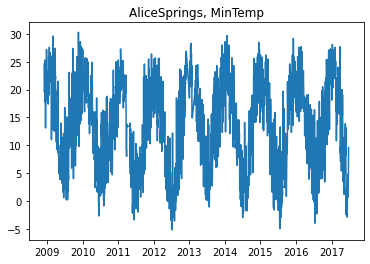

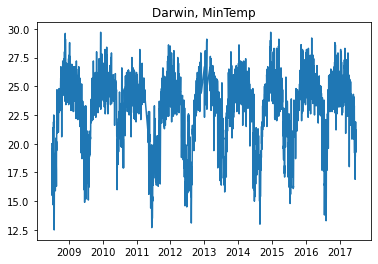

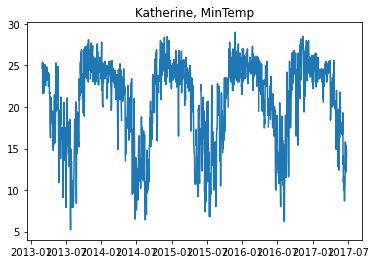

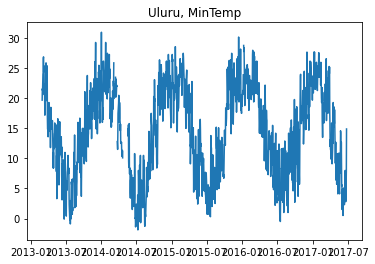

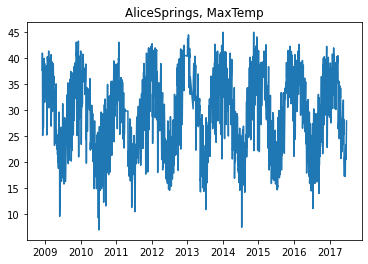

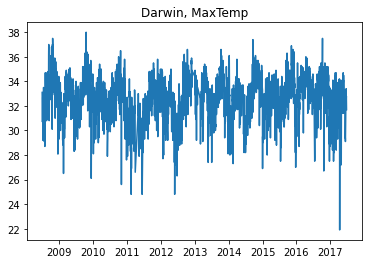

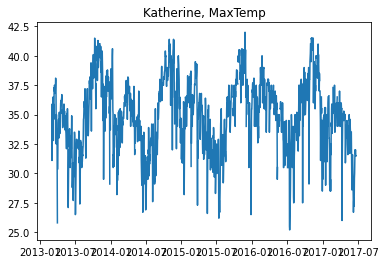

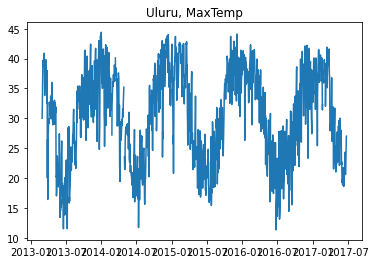

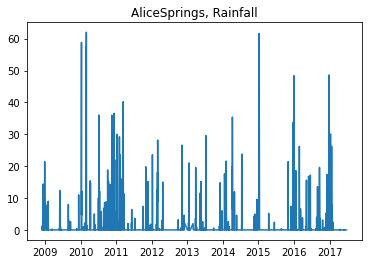

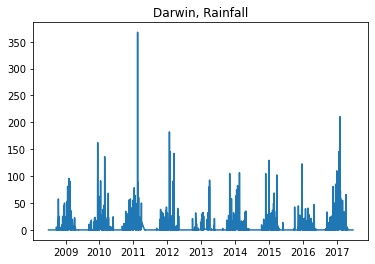

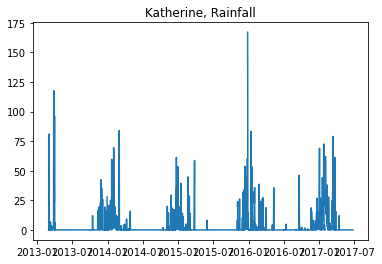

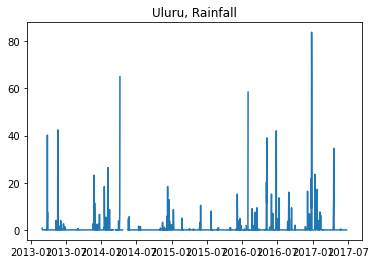

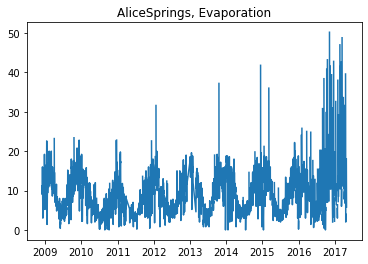

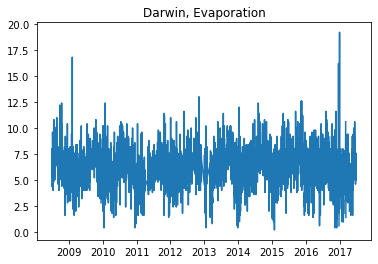

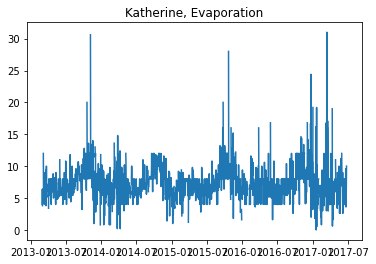

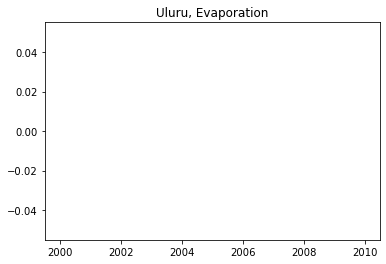

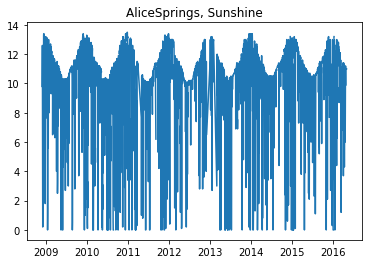

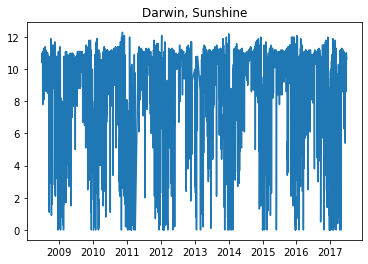

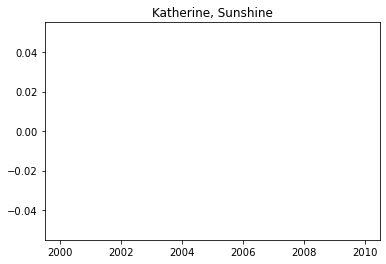

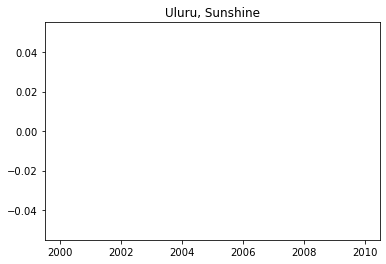

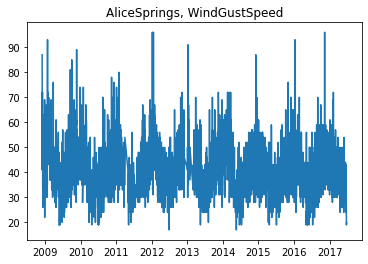

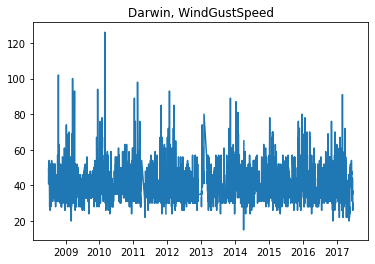

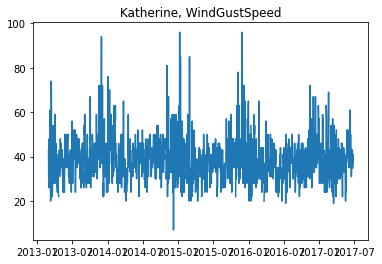

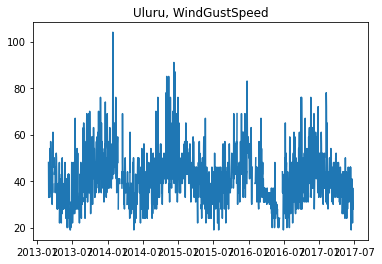

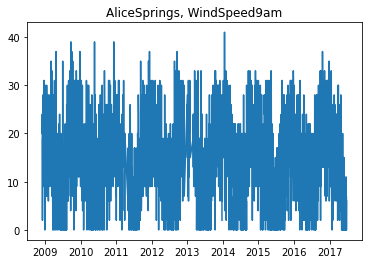

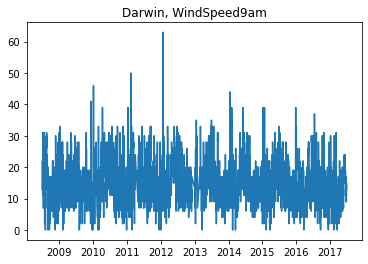

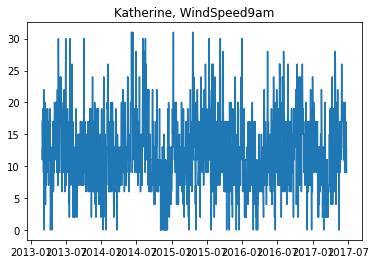

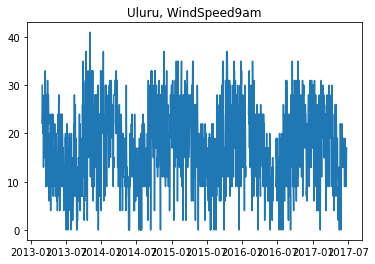

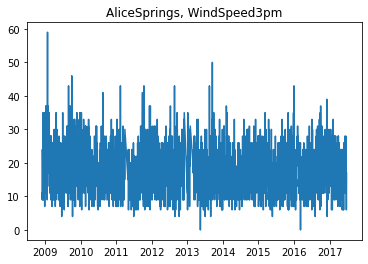

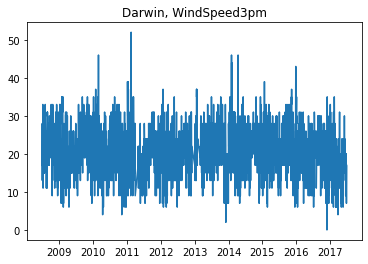

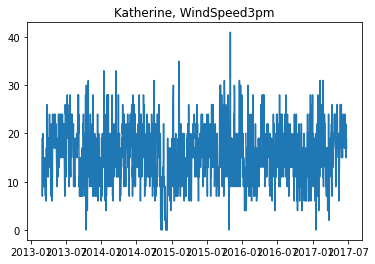

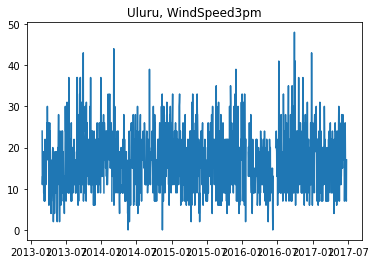

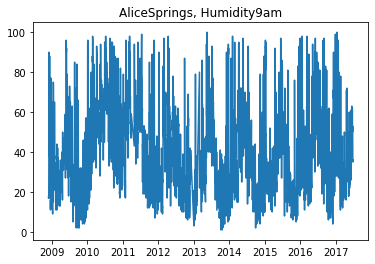

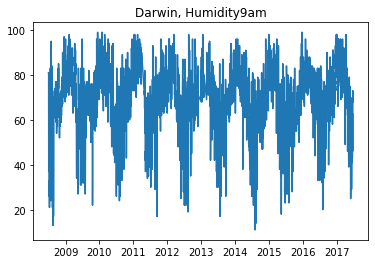

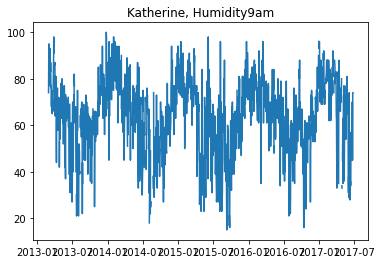

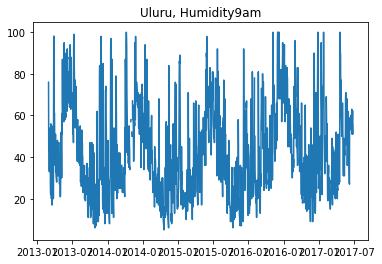

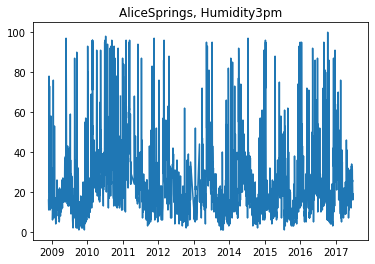

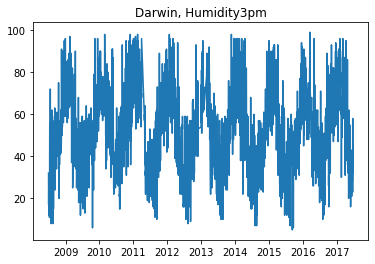

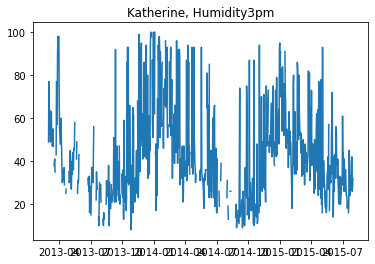

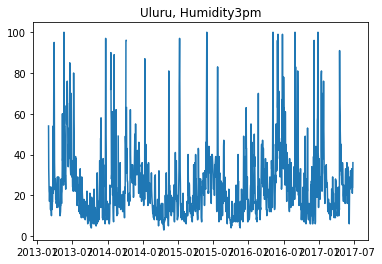

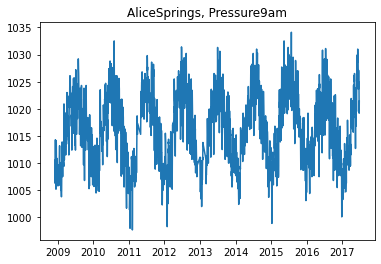

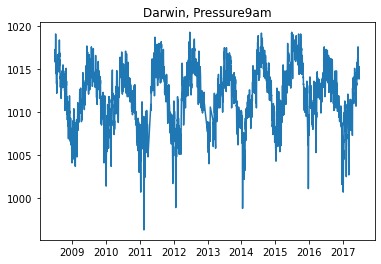

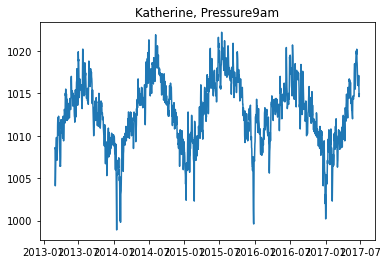

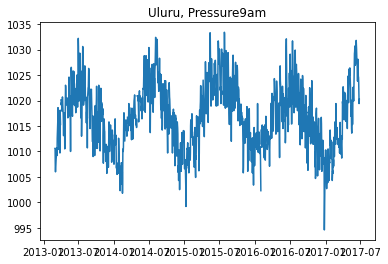

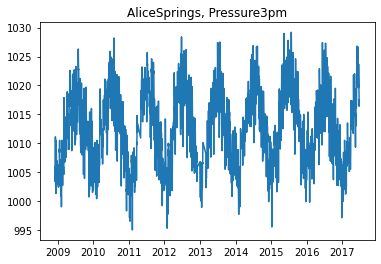

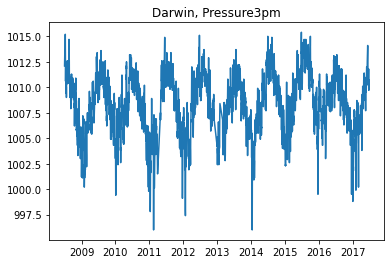

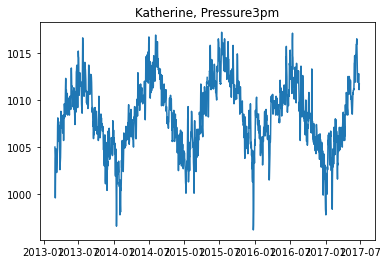

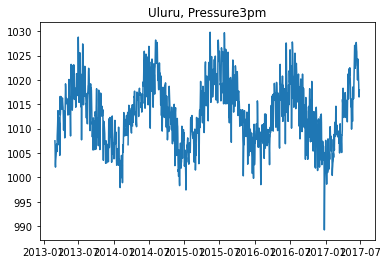

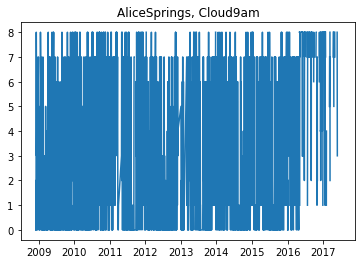

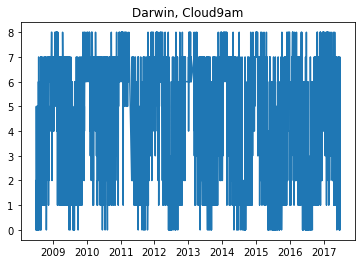

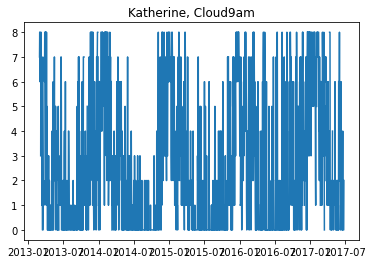

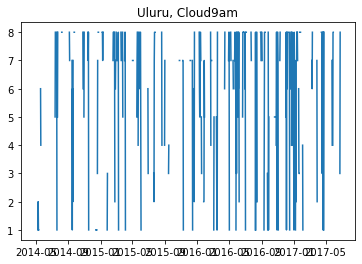

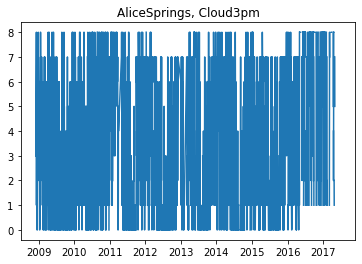

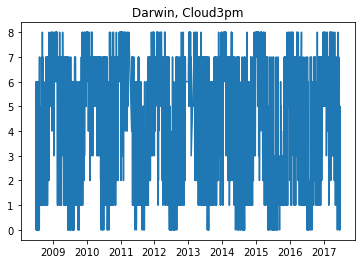

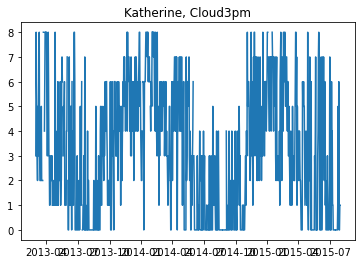

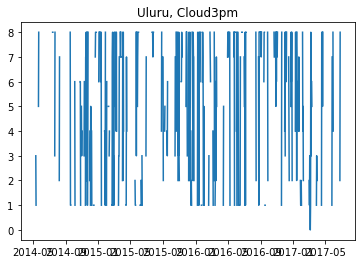

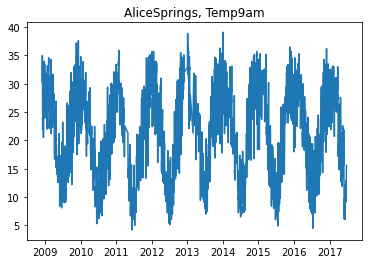

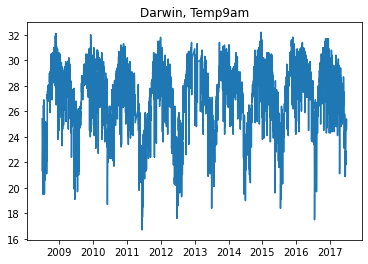

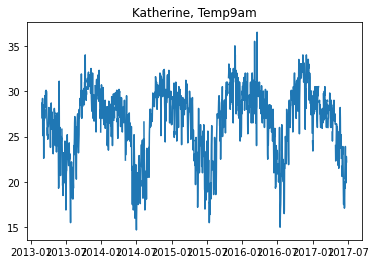

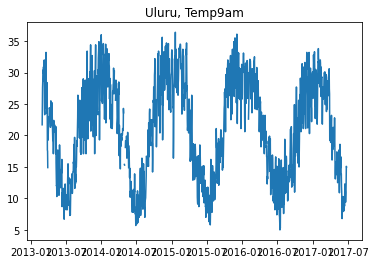

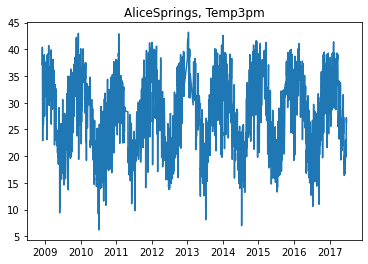

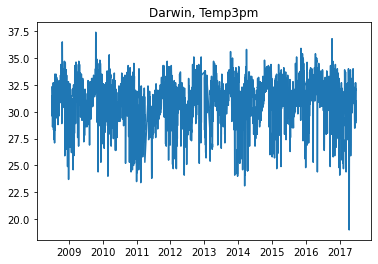

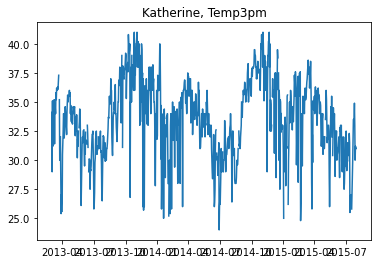

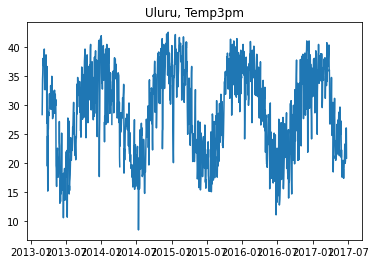

In [117]:
for col in numeric_cols:
    for location in locations:
        plt.figure()
        plt.plot(northern[northern['Location']==location][col])
        plt.title('{l}, {c}'.format(l=location, c=col))

In [118]:
locationdf = []
featuredf = []
nancountdf = []
rowcountdf = []
nanpercentdf = []

for col in cols:
    for location in locations:
        nancount = northern[northern['Location']==location][col].isna().sum()
        rowcount = len(northern[northern['Location']==location][col])
        locationdf.append(location)
        featuredf.append(col)
        nancountdf.append(nancount)
        rowcountdf.append(rowcount)
        nanpercentdf.append(nancount/rowcount)

In [119]:
missing_summary = pd.DataFrame({'Location': locationdf, 'Feature': featuredf, 'NaN Count': nancountdf, 'Row Count': rowcountdf, 'NaN Percentage': nanpercentdf})
missing_summary

Location       Feature  NaN Count  Row Count  NaN Percentage
0   AliceSprings      Location          0       3040        0.000000
1         Darwin      Location          0       3193        0.000000
2      Katherine      Location          0       1578        0.000000
3          Uluru      Location          0       1578        0.000000
4   AliceSprings       MinTemp          1       3040        0.000329
..           ...           ...        ...        ...             ...
87         Uluru  RainTomorrow         57       1578        0.036122
88  AliceSprings         State          0       3040        0.000000
89        Darwin         State          0       3193        0.000000
90     Katherine         State          0       1578        0.000000
91         Uluru         State          0       1578        0.000000

[92 rows x 5 columns]

In [120]:
cols

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'State'],
      dtype='object')

In [121]:
missing_summary[missing_summary['NaN Percentage'] > 0.25]

Location      Feature  NaN Count  Row Count  NaN Percentage
19      Uluru  Evaporation       1578       1578        1.000000
22  Katherine     Sunshine       1578       1578        1.000000
23      Uluru     Sunshine       1578       1578        1.000000
54  Katherine  Humidity3pm        836       1578        0.529785
67      Uluru     Cloud9am       1230       1578        0.779468
70  Katherine     Cloud3pm        724       1578        0.458809
71      Uluru     Cloud3pm       1161       1578        0.735741
78  Katherine      Temp3pm        724       1578        0.458809

In [122]:
missing_summary[missing_summary['Feature'] == 'Humidity3pm']

Location      Feature  NaN Count  Row Count  NaN Percentage
52  AliceSprings  Humidity3pm          5       3040        0.001645
53        Darwin  Humidity3pm          2       3193        0.000626
54     Katherine  Humidity3pm        836       1578        0.529785
55         Uluru  Humidity3pm          4       1578        0.002535

In [123]:
missing_summary[missing_summary['Feature'] == 'Humidity9am']

Location      Feature  NaN Count  Row Count  NaN Percentage
48  AliceSprings  Humidity9am          3       3040        0.000987
49        Darwin  Humidity9am          1       3193        0.000313
50     Katherine  Humidity9am         81       1578        0.051331
51         Uluru  Humidity9am         15       1578        0.009506

In [124]:
missing_summary[missing_summary['Feature'] == 'Cloud9am']

Location   Feature  NaN Count  Row Count  NaN Percentage
64  AliceSprings  Cloud9am        334       3040        0.109868
65        Darwin  Cloud9am          1       3193        0.000313
66     Katherine  Cloud9am         41       1578        0.025982
67         Uluru  Cloud9am       1230       1578        0.779468

In [125]:
missing_summary[missing_summary['Feature'] == 'Temp9am']

Location  Feature  NaN Count  Row Count  NaN Percentage
72  AliceSprings  Temp9am          0       3040        0.000000
73        Darwin  Temp9am          0       3193        0.000000
74     Katherine  Temp9am         42       1578        0.026616
75         Uluru  Temp9am         15       1578        0.009506

In [126]:
missing_summary[missing_summary['Location'] == 'Uluru']

Location        Feature  NaN Count  Row Count  NaN Percentage
3     Uluru       Location          0       1578        0.000000
7     Uluru        MinTemp         35       1578        0.022180
11    Uluru        MaxTemp          7       1578        0.004436
15    Uluru       Rainfall         56       1578        0.035488
19    Uluru    Evaporation       1578       1578        1.000000
23    Uluru       Sunshine       1578       1578        1.000000
27    Uluru    WindGustDir         54       1578        0.034221
31    Uluru  WindGustSpeed         54       1578        0.034221
35    Uluru     WindDir9am         66       1578        0.041825
39    Uluru     WindDir3pm         33       1578        0.020913
43    Uluru   WindSpeed9am         36       1578        0.022814
47    Uluru   WindSpeed3pm         30       1578        0.019011
51    Uluru    Humidity9am         15       1578        0.009506
55    Uluru    Humidity3pm          4       1578        0.002535
59    Uluru    Pressure9am         10       1578        0.006337
63    Uluru    Pressure3pm          4       1578        0.002535
67    Uluru       Cloud9am       1230       1578        0.779468
71    Uluru       Cloud3pm       1161       1578        0.735741
75    Uluru        Temp9am         15       1578        0.009506
79    Uluru        Temp3pm          4       1578        0.002535
83    Uluru      RainToday         56       1578        0.035488
87    Uluru   RainTomorrow         57       1578        0.036122
91    Uluru          State          0       1578        0.000000

In [127]:
len(northern[northern['Location'] == 'Uluru'])

1578

In [128]:
missing_summary[missing_summary['Location'] == 'Katherine']

Location        Feature  NaN Count  Row Count  NaN Percentage
2   Katherine       Location          0       1578        0.000000
6   Katherine        MinTemp         49       1578        0.031052
10  Katherine        MaxTemp         40       1578        0.025349
14  Katherine       Rainfall         18       1578        0.011407
18  Katherine    Evaporation         93       1578        0.058935
22  Katherine       Sunshine       1578       1578        1.000000
26  Katherine    WindGustDir         29       1578        0.018378
30  Katherine  WindGustSpeed         29       1578        0.018378
34  Katherine     WindDir9am         40       1578        0.025349
38  Katherine     WindDir3pm         18       1578        0.011407
42  Katherine   WindSpeed9am          1       1578        0.000634
46  Katherine   WindSpeed3pm          6       1578        0.003802
50  Katherine    Humidity9am         81       1578        0.051331
54  Katherine    Humidity3pm        836       1578        0.529785
58  Katherine    Pressure9am          1       1578        0.000634
62  Katherine    Pressure3pm          5       1578        0.003169
66  Katherine       Cloud9am         41       1578        0.025982
70  Katherine       Cloud3pm        724       1578        0.458809
74  Katherine        Temp9am         42       1578        0.026616
78  Katherine        Temp3pm        724       1578        0.458809
82  Katherine      RainToday         18       1578        0.011407
86  Katherine   RainTomorrow         19       1578        0.012041
90  Katherine          State          0       1578        0.000000

In [129]:
len(northern[northern['Location'] == 'Katherine'])

1578

In [130]:
len(northern[northern['Location'] == 'Darwin'])

3193

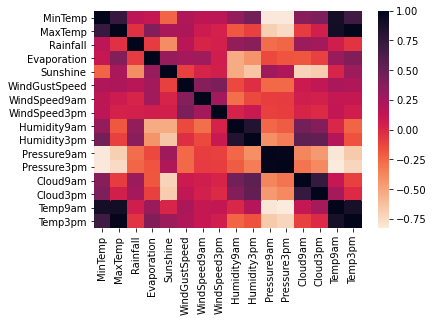

In [131]:
corr = northern.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='rocket_r')

In [132]:
northern[northern['Location']=='Uluru'].corrwith(northern[northern['Location']=='AliceSprings'])

MinTemp          0.920602
MaxTemp          0.935864
Rainfall         0.263148
Evaporation           NaN
Sunshine              NaN
WindGustSpeed    0.551591
WindSpeed9am     0.503735
WindSpeed3pm     0.428508
Humidity9am      0.779773
Humidity3pm      0.684616
Pressure9am      0.988135
Pressure3pm      0.985618
Cloud9am         0.111279
Cloud3pm         0.109949
Temp9am          0.951130
Temp3pm          0.926100
dtype: float64

In [133]:
northern['Evaporation'].notna().sum()

7449

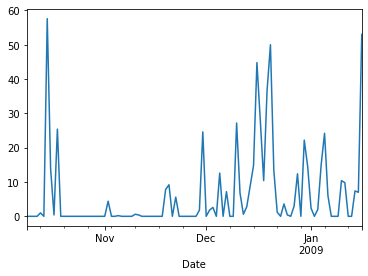

In [134]:
northern[northern['Location']=='Darwin']['Rainfall'][100:200].plot()

In [135]:
# Dropping Uluru because too many missing values and quite a small area
northern = northern[northern['Location'] != 'Uluru']

In [136]:
# Dropping Sunshine columns because too many missing values in Katherine
northern = northern.drop(['Sunshine'], axis=1)

In [137]:
# Dropping some columns because too highly correlated to their 9am counterparts
northern = northern.drop(['Humidity3pm', 'Pressure3pm', 'Cloud3pm'], axis=1)

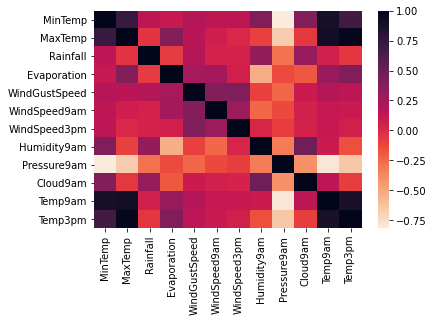

In [138]:
corr = northern.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='rocket_r')

In [139]:
# Dropping 2 wind columns because too highly correlated with WindGustSpeed
northern = northern.drop(['WindSpeed9am', 'WindSpeed3pm'], axis=1)

In [140]:
northern.isna().sum()

Location           0
MinTemp           51
MaxTemp           43
Rainfall          26
Evaporation      362
WindGustDir      126
WindGustSpeed    122
WindDir9am       298
WindDir3pm        25
Humidity9am       85
Pressure9am        3
Cloud9am         376
Temp9am           42
Temp3pm          728
RainToday         26
RainTomorrow      29
State              0
dtype: int64

In [141]:
total_nans = northern.isna().sum().sum()
total_nans

2342

In [142]:
total_data = len(northern) * len(northern.columns)
total_data

132787

In [143]:
total_nans/total_data

0.017637268708533216

In [144]:
numeric_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed', 'Humidity9am', 'Pressure9am', 'Cloud9am', 'Temp9am', 'Temp3pm']

In [145]:
# Imputing numeric columns with time series interpolation
for col in numeric_cols:
    for location in locations:
        df = northern[northern['Location']==location][col]
        df = df.interpolate(method='time')
        northern.loc[northern['Location']==location, col] = df

In [146]:
# Creating a new columns: average temperature and temperature difference
northern['AvgTemp'] = northern.loc[:, ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']].mean(axis=1)
northern['TempDiff'] = northern['MaxTemp'] - northern['MinTemp']

In [147]:
# Dropping unused temperature columns
northern = northern.drop(['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm'], axis=1)

In [148]:
northern.isna().sum()

Location           0
Rainfall           0
Evaporation        0
WindGustDir      126
WindGustSpeed      0
WindDir9am       298
WindDir3pm        25
Humidity9am        0
Pressure9am        0
Cloud9am           0
RainToday         26
RainTomorrow      29
State              0
AvgTemp            0
TempDiff           0
dtype: int64

In [149]:
total_nans = northern.isna().sum().sum()
total_nans

504

In [150]:
total_data = len(northern) * len(northern.columns)
total_data

117165

In [151]:
total_nans / total_data

0.004301625912175137

In [152]:
northern[northern['Location']=='Katherine'].corrwith(northern[northern['Location']=='Darwin'])

Rainfall         0.362728
Evaporation      0.249820
WindGustSpeed    0.315425
Humidity9am      0.662957
Pressure9am      0.975381
Cloud9am         0.636979
AvgTemp          0.797833
TempDiff         0.770388
dtype: float64

In [153]:
# northern[northern['Location']=='Darwin']['Sunshine'].hist()

In [154]:
# northern[northern['Location']=='AliceSprings']['Sunshine'].hist()

In [155]:
# northern.loc[northern['Location']=='Katherine', 'Sunshine'] = northern[northern['Location']=='Darwin']['Sunshine']

In [156]:
northern.isna().sum()

Location           0
Rainfall           0
Evaporation        0
WindGustDir      126
WindGustSpeed      0
WindDir9am       298
WindDir3pm        25
Humidity9am        0
Pressure9am        0
Cloud9am           0
RainToday         26
RainTomorrow      29
State              0
AvgTemp            0
TempDiff           0
dtype: int64

In [157]:
wind_cols = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
locations = ['AliceSprings', 'Darwin', 'Katherine']

for col in wind_cols:
    for location in locations:
        df = northern[northern['Location']==location][col]
        print(location, col, df.mode())
        northern.loc[northern['Location']==location, col] = df.fillna(df.mode().item())

AliceSprings WindGustDir 0    ESE
dtype: object
Darwin WindGustDir 0    E
dtype: object
Katherine WindGustDir 0    E
dtype: object
AliceSprings WindDir3pm 0    ESE
dtype: object
Darwin WindDir3pm 0    WNW
dtype: object
Katherine WindDir3pm 0    ESE
dtype: object
AliceSprings WindDir9am 0    ESE
dtype: object
Darwin WindDir9am 0    SE
dtype: object
Katherine WindDir9am 0    SE
dtype: object


In [158]:
northern.isna().sum()

Location          0
Rainfall          0
Evaporation       0
WindGustDir       0
WindGustSpeed     0
WindDir9am        0
WindDir3pm        0
Humidity9am       0
Pressure9am       0
Cloud9am          0
RainToday        26
RainTomorrow     29
State             0
AvgTemp           0
TempDiff          0
dtype: int64

In [159]:
northern.groupby('RainToday').agg({'Rainfall': ['min', 'max']})

Rainfall       
               min    max
RainToday                
No             0.0    1.0
Yes            1.2  367.6

In [160]:
northern['RainTomorrow'].value_counts(dropna=False)

No     6421
Yes    1361
NaN      29
Name: RainTomorrow, dtype: int64

In [161]:
for loc in locations:
    print(northern[northern['Location']==location]['RainTomorrow'])

Date
2013-03-01     No
2013-03-02     No
2013-03-03    Yes
2013-03-04     No
2013-03-05     No
             ... 
2017-06-21     No
2017-06-22     No
2017-06-23     No
2017-06-24    NaN
2017-06-25    NaN
Name: RainTomorrow, Length: 1578, dtype: object
Date
2013-03-01     No
2013-03-02     No
2013-03-03    Yes
2013-03-04     No
2013-03-05     No
             ... 
2017-06-21     No
2017-06-22     No
2017-06-23     No
2017-06-24    NaN
2017-06-25    NaN
Name: RainTomorrow, Length: 1578, dtype: object
Date
2013-03-01     No
2013-03-02     No
2013-03-03    Yes
2013-03-04     No
2013-03-05     No
             ... 
2017-06-21     No
2017-06-22     No
2017-06-23     No
2017-06-24    NaN
2017-06-25    NaN
Name: RainTomorrow, Length: 1578, dtype: object


In [162]:
northern.reset_index(inplace=True)

In [163]:
northern

Date      Location  Rainfall  Evaporation WindGustDir  \
0    2008-12-01  AliceSprings       0.0         11.2         WNW   
1    2008-12-02  AliceSprings       1.2          9.0         NNW   
2    2008-12-03  AliceSprings       0.0         11.6         NNW   
3    2008-12-04  AliceSprings       0.0         16.0         WNW   
4    2008-12-05  AliceSprings       0.2         12.2         SSW   
...         ...           ...       ...          ...         ...   
7806 2017-06-21     Katherine       0.0          3.6         ESE   
7807 2017-06-22     Katherine       0.0          4.0         ESE   
7808 2017-06-23     Katherine       0.0          6.4         ESE   
7809 2017-06-24     Katherine       0.0         10.0           E   
7810 2017-06-25     Katherine       0.0         10.0           E   

      WindGustSpeed WindDir9am WindDir3pm  Humidity9am  Pressure9am  Cloud9am  \
0              87.0        NNE         NE         17.0       1010.5       0.0   
1              41.0        NNW          S         18.0       1009.3       2.0   
2              48.0        ENE          N         17.0       1006.3       0.0   
3              72.0        SSW          W         29.0       1008.7       3.0   
4              46.0          S          S         58.0       1014.0       7.0   
...             ...        ...        ...          ...          ...       ...   
7806           43.0        ESE        ESE         70.0       1016.6       0.0   
7807           37.0         SE        ESE         45.0       1017.1       0.0   
7808           41.0         SE         SE         74.0       1016.1       0.0   
7809           35.0          E          E         74.0       1014.6       2.0   
7810           35.0          E          E         74.0       1014.9       2.0   

     RainToday RainTomorrow               State  AvgTemp  TempDiff  
0           No          Yes  Northern Territory   31.200      18.0  
1          Yes           No  Northern Territory   32.700      18.1  
2           No           No  Northern Territory   34.800      18.0  
3           No           No  Northern Territory   33.500      15.8  
4           No          Yes  Northern Territory   28.425       9.0  
...        ...          ...                 ...      ...       ...  
7806        No           No  Northern Territory   24.875      16.1  
7807        No           No  Northern Territory   23.650      19.3  
7808        No           No  Northern Territory   25.050      16.6  
7809        No          NaN  Northern Territory   24.675      17.5  
7810       NaN          NaN  Northern Territory   24.675      17.5  

[7811 rows x 16 columns]

In [164]:
df = northern[northern['Location']==locations[1]]
df.index.min()

3040

In [165]:
# Imputing values in 'RainToday' and 'RainTomorrow' based on values in 'Rainfall'
for location in locations:
    df = northern[northern['Location']==location]
    n = len(df)
    for i, row in df.iterrows():
        if pd.isna(df.loc[i,'RainToday']):
            df.loc[i, 'RainToday'] = 'Yes' if df.loc[i, 'Rainfall'] > 1 else 'No'
        if i>df.index.min():
            if pd.isna(df.loc[i-1, 'RainTomorrow']):
                df.loc[i-1, 'RainTomorrow'] = 'Yes' if df.loc[i, 'Rainfall'] > 1 else 'No'
    northern.loc[northern['Location']==location] = df

E:\Anaconda\Anaconda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [166]:
northern.isna().sum()

Date             0
Location         0
Rainfall         0
Evaporation      0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
Humidity9am      0
Pressure9am      0
Cloud9am         0
RainToday        0
RainTomorrow     3
State            0
AvgTemp          0
TempDiff         0
dtype: int64

### Creating first order variables

In [172]:
# Creating the new first-order variables' columns and filling them with NaN first
northern['RainfallTomorrow'] = np.nan

firstorder_cols = ['Rainfall', 'Evaporation', 'WindGustSpeed', 'Humidity9am', 'Pressure9am', 'Cloud9am', 'AvgTemp', 'TempDiff']

for col in firstorder_cols:
    new_col = 'delta_' + col
    northern[new_col] = np.nan

northern

Date      Location  Rainfall  Evaporation WindGustDir  \
0    2008-12-01  AliceSprings       0.0         11.2         WNW   
1    2008-12-02  AliceSprings       1.2          9.0         NNW   
2    2008-12-03  AliceSprings       0.0         11.6         NNW   
3    2008-12-04  AliceSprings       0.0         16.0         WNW   
4    2008-12-05  AliceSprings       0.2         12.2         SSW   
...         ...           ...       ...          ...         ...   
7806 2017-06-21     Katherine       0.0          3.6         ESE   
7807 2017-06-22     Katherine       0.0          4.0         ESE   
7808 2017-06-23     Katherine       0.0          6.4         ESE   
7809 2017-06-24     Katherine       0.0         10.0           E   
7810 2017-06-25     Katherine       0.0         10.0           E   

      WindGustSpeed WindDir9am WindDir3pm  Humidity9am  Pressure9am  ...  \
0              87.0        NNE         NE         17.0       1010.5  ...   
1              41.0        NNW          S         18.0       1009.3  ...   
2              48.0        ENE          N         17.0       1006.3  ...   
3              72.0        SSW          W         29.0       1008.7  ...   
4              46.0          S          S         58.0       1014.0  ...   
...             ...        ...        ...          ...          ...  ...   
7806           43.0        ESE        ESE         70.0       1016.6  ...   
7807           37.0         SE        ESE         45.0       1017.1  ...   
7808           41.0         SE         SE         74.0       1016.1  ...   
7809           35.0          E          E         74.0       1014.6  ...   
7810           35.0          E          E         74.0       1014.9  ...   

      TempDiff RainfallTomorrow delta_Rainfall delta_Evaporation  \
0         18.0              NaN            NaN               NaN   
1         18.1              NaN            NaN               NaN   
2         18.0              NaN            NaN               NaN   
3         15.8              NaN            NaN               NaN   
4          9.0              NaN            NaN               NaN   
...        ...              ...            ...               ...   
7806      16.1              NaN            NaN               NaN   
7807      19.3              NaN            NaN               NaN   
7808      16.6              NaN            NaN               NaN   
7809      17.5              NaN            NaN               NaN   
7810      17.5              NaN            NaN               NaN   

      delta_WindGustSpeed  delta_Humidity9am  delta_Pressure9am  \
0                     NaN                NaN                NaN   
1                     NaN                NaN                NaN   
2                     NaN                NaN                NaN   
3                     NaN                NaN                NaN   
4                     NaN                NaN                NaN   
...                   ...                ...                ...   
7806                  NaN                NaN                NaN   
7807                  NaN                NaN                NaN   
7808                  NaN                NaN                NaN   
7809                  NaN                NaN                NaN   
7810                  NaN                NaN                NaN   

      delta_Cloud9am  delta_AvgTemp  delta_TempDiff  
0                NaN            NaN             NaN  
1                NaN            NaN             NaN  
2                NaN            NaN             NaN  
3                NaN            NaN             NaN  
4                NaN            NaN             NaN  
...              ...            ...             ...  
7806             NaN            NaN             NaN  
7807             NaN            NaN             NaN  
7808             NaN            NaN             NaN  
7809             NaN            NaN             NaN  
7810             NaN            NaN             NaN  

[7811 rows

In [173]:
# Filling in first-order variables' values
for location in locations:
    df = northern[northern['Location']==location]
    df.loc[:, 'RainfallTomorrow'] = df['Rainfall'].shift(-1)
    for col in firstorder_cols:
        colname = 'delta_' + col
        df.loc[:, colname] = df[col] - df[col].shift(1)
    northern.loc[northern['Location']==location] = df

E:\Anaconda\Anaconda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [174]:
northern

Date      Location  Rainfall  Evaporation WindGustDir  \
0    2008-12-01  AliceSprings       0.0         11.2         WNW   
1    2008-12-02  AliceSprings       1.2          9.0         NNW   
2    2008-12-03  AliceSprings       0.0         11.6         NNW   
3    2008-12-04  AliceSprings       0.0         16.0         WNW   
4    2008-12-05  AliceSprings       0.2         12.2         SSW   
...         ...           ...       ...          ...         ...   
7806 2017-06-21     Katherine       0.0          3.6         ESE   
7807 2017-06-22     Katherine       0.0          4.0         ESE   
7808 2017-06-23     Katherine       0.0          6.4         ESE   
7809 2017-06-24     Katherine       0.0         10.0           E   
7810 2017-06-25     Katherine       0.0         10.0           E   

      WindGustSpeed WindDir9am WindDir3pm  Humidity9am  Pressure9am  ...  \
0              87.0        NNE         NE         17.0       1010.5  ...   
1              41.0        NNW          S         18.0       1009.3  ...   
2              48.0        ENE          N         17.0       1006.3  ...   
3              72.0        SSW          W         29.0       1008.7  ...   
4              46.0          S          S         58.0       1014.0  ...   
...             ...        ...        ...          ...          ...  ...   
7806           43.0        ESE        ESE         70.0       1016.6  ...   
7807           37.0         SE        ESE         45.0       1017.1  ...   
7808           41.0         SE         SE         74.0       1016.1  ...   
7809           35.0          E          E         74.0       1014.6  ...   
7810           35.0          E          E         74.0       1014.9  ...   

      TempDiff RainfallTomorrow delta_Rainfall delta_Evaporation  \
0         18.0              1.2            NaN               NaN   
1         18.1              0.0            1.2              -2.2   
2         18.0              0.0           -1.2               2.6   
3         15.8              0.2            0.0               4.4   
4          9.0              2.6            0.2              -3.8   
...        ...              ...            ...               ...   
7806      16.1              0.0            0.0              -6.0   
7807      19.3              0.0            0.0               0.4   
7808      16.6              0.0            0.0               2.4   
7809      17.5              0.0            0.0               3.6   
7810      17.5              NaN            0.0               0.0   

      delta_WindGustSpeed  delta_Humidity9am  delta_Pressure9am  \
0                     NaN                NaN                NaN   
1                   -46.0                1.0               -1.2   
2                     7.0               -1.0               -3.0   
3                    24.0               12.0                2.4   
4                   -26.0               29.0                5.3   
...                   ...                ...                ...   
7806                  8.0               23.0                0.7   
7807                 -6.0              -25.0                0.5   
7808                  4.0               29.0               -1.0   
7809                 -6.0                0.0               -1.5   
7810                  0.0                0.0                0.3   

      delta_Cloud9am  delta_AvgTemp  delta_TempDiff  
0                NaN            NaN             NaN  
1                2.0          1.500             0.1  
2               -2.0          2.100            -0.1  
3                3.0         -1.300            -2.2  
4                4.0         -5.075            -6.8  
...              ...            ...             ...  
7806             0.0         -0.075            -0.9  
7807             0.0         -1.225             3.2  
7808             0.0          1.400            -2.7  
7809             2.0         -0.375             0.9  
7810             0.0          0.000             0.0  

[7811 rows

In [175]:
# Number or rows with NaN
northern.shape[0] - northern.dropna().shape[0]

6

In [176]:
northern = northern[northern['RainfallTomorrow'].notna()]

In [180]:
# Final number of rows with NaN 
# NaN values are only in the first-order variables
northern.shape[0] - northern.dropna().shape[0]

3

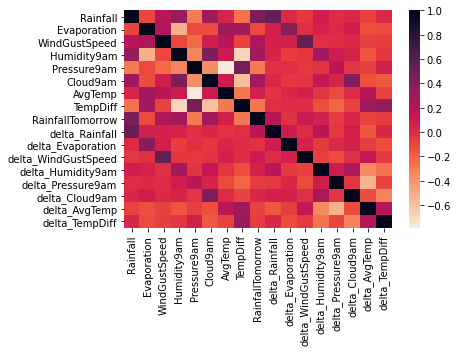

In [181]:
corr = northern.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='rocket_r')

In [184]:
corr[(corr > 0.5) | (corr < -0.5)]

Rainfall  Evaporation  WindGustSpeed  Humidity9am  \
Rainfall               1.0000          NaN            NaN          NaN   
Evaporation               NaN     1.000000            NaN    -0.520822   
WindGustSpeed             NaN          NaN       1.000000          NaN   
Humidity9am               NaN    -0.520822            NaN     1.000000   
Pressure9am               NaN          NaN            NaN          NaN   
Cloud9am                  NaN          NaN            NaN          NaN   
AvgTemp                   NaN          NaN            NaN          NaN   
TempDiff                  NaN          NaN            NaN    -0.687214   
RainfallTomorrow          NaN          NaN            NaN          NaN   
delta_Rainfall         0.5294          NaN            NaN          NaN   
delta_Evaporation         NaN          NaN            NaN          NaN   
delta_WindGustSpeed       NaN          NaN       0.547899          NaN   
delta_Humidity9am         NaN          NaN            NaN          NaN   
delta_Pressure9am         NaN          NaN            NaN          NaN   
delta_Cloud9am            NaN          NaN            NaN          NaN   
delta_AvgTemp             NaN          NaN            NaN          NaN   
delta_TempDiff            NaN          NaN            NaN          NaN   

                     Pressure9am  Cloud9am   AvgTemp  TempDiff  \
Rainfall                     NaN       NaN       NaN       NaN   
Evaporation                  NaN       NaN       NaN       NaN   
WindGustSpeed                NaN       NaN       NaN       NaN   
Humidity9am                  NaN       NaN       NaN -0.687214   
Pressure9am             1.000000       NaN -0.786807       NaN   
Cloud9am                     NaN  1.000000       NaN -0.583616   
AvgTemp                -0.786807       NaN  1.000000       NaN   
TempDiff                     NaN -0.583616       NaN  1.000000   
RainfallTomorrow             NaN       NaN       NaN       NaN   
delta_Rainfall               NaN       NaN       NaN       NaN   
delta_Evaporation            NaN       NaN       NaN       NaN   
delta_WindGustSpeed          NaN       NaN       NaN       NaN   
delta_Humidity9am            NaN       NaN       NaN       NaN   
delta_Pressure9am            NaN       NaN       NaN       NaN   
delta_Cloud9am               NaN       NaN       NaN       NaN   
delta_AvgTemp                NaN       NaN       NaN       NaN   
delta_TempDiff               NaN       NaN       NaN       NaN   

                     RainfallTomorrow  delta_Rainfall  delta_Evaporation  \
Rainfall                          NaN          0.5294                NaN   
Evaporation                       NaN             NaN                NaN   
WindGustSpeed                     NaN             NaN                NaN   
Humidity9am                       NaN             NaN                NaN   
Pressure9am                       NaN             NaN                NaN   
Cloud9am                          NaN             NaN                NaN   
AvgTemp                           NaN             NaN                NaN   
TempDiff                          NaN             NaN                NaN   
RainfallTomorrow                  1.0             NaN                NaN   
delta_Rainfall                    NaN          1.0000                NaN   
delta_Evaporation                 NaN             NaN                1.0   
delta_WindGustSpeed               NaN             NaN                NaN   
delta_Humidity9am                 NaN             NaN                NaN   
delta_Pressure9am                 NaN             NaN                NaN   
delta_Cloud9am                    NaN             NaN                NaN   
delta_AvgTemp                     NaN             NaN                NaN   
delta_TempDiff                    NaN             NaN                NaN   

                     delta_WindGustSpeed  delta_Humidity9am  \
Rainfall                             NaN                NaN   
Evap

High correlations between:
- AvgTemp and Pressure (above 0.7)
- Cloud and Humidity (above 0.6)
- x and delta_x (above 0.5)

In [183]:
northern.to_csv('northern-fin.csv', index=False)

# Analysis

In [2]:
data = pd.read_csv('northern-fin.csv')
data = data.drop(['WindDir9am'], axis=1)
data

Date      Location  Rainfall  Evaporation WindGustDir  \
0     2008-12-01  AliceSprings       0.0         11.2         WNW   
1     2008-12-02  AliceSprings       1.2          9.0         NNW   
2     2008-12-03  AliceSprings       0.0         11.6         NNW   
3     2008-12-04  AliceSprings       0.0         16.0         WNW   
4     2008-12-05  AliceSprings       0.2         12.2         SSW   
...          ...           ...       ...          ...         ...   
7803  2017-06-20     Katherine       0.0          9.6           E   
7804  2017-06-21     Katherine       0.0          3.6         ESE   
7805  2017-06-22     Katherine       0.0          4.0         ESE   
7806  2017-06-23     Katherine       0.0          6.4         ESE   
7807  2017-06-24     Katherine       0.0         10.0           E   

      WindGustSpeed WindDir3pm  Humidity9am  Pressure9am  Cloud9am  ...  \
0              87.0         NE         17.0       1010.5       0.0  ...   
1              41.0          S         18.0       1009.3       2.0  ...   
2              48.0          N         17.0       1006.3       0.0  ...   
3              72.0          W         29.0       1008.7       3.0  ...   
4              46.0          S         58.0       1014.0       7.0  ...   
...             ...        ...          ...          ...       ...  ...   
7803           35.0        ESE         47.0       1015.9       0.0  ...   
7804           43.0        ESE         70.0       1016.6       0.0  ...   
7805           37.0        ESE         45.0       1017.1       0.0  ...   
7806           41.0         SE         74.0       1016.1       0.0  ...   
7807           35.0          E         74.0       1014.6       2.0  ...   

     TempDiff RainfallTomorrow delta_Rainfall  delta_Evaporation  \
0        18.0              1.2            NaN                NaN   
1        18.1              0.0            1.2               -2.2   
2        18.0              0.0           -1.2                2.6   
3        15.8              0.2            0.0                4.4   
4         9.0              2.6            0.2               -3.8   
...       ...              ...            ...                ...   
7803     17.0              0.0            0.0                3.2   
7804     16.1              0.0            0.0               -6.0   
7805     19.3              0.0            0.0                0.4   
7806     16.6              0.0            0.0                2.4   
7807     17.5              0.0            0.0                3.6   

      delta_WindGustSpeed  delta_Humidity9am  delta_Pressure9am  \
0                     NaN                NaN                NaN   
1                   -46.0                1.0               -1.2   
2                     7.0               -1.0               -3.0   
3                    24.0               12.0                2.4   
4                   -26.0               29.0                5.3   
...                   ...                ...                ...   
7803                 -6.0               -9.0               -0.7   
7804                  8.0               23.0                0.7   
7805                 -6.0              -25.0                0.5   
7806                  4.0               29.0               -1.0   
7807                 -6.0                0.0               -1.5   

      delta_Cloud9am  delta_AvgTemp  delta_TempDiff  
0                NaN            NaN             NaN  
1                2.0          1.500             0.1  
2               -2.0          2.100            -0.1  
3                3.0         -1.300            -2.2  
4                4.0         -5.075            -6.8  
...              ...            ...             ...  
7803             0.0          1.025            -2.6  
7804             0.0         -0.075            -0.9  
7805             0.0         -1.225             3.2  
7806             0.0          1.400            -2.7  
7807             2.0         -0.375             0.9  

[7808 rows 

In [3]:
data['Location'].unique()

array(['AliceSprings', 'Darwin', 'Katherine'], dtype=object)

In [4]:
data.columns

Index(['Date', 'Location', 'Rainfall', 'Evaporation', 'WindGustDir',
       'WindGustSpeed', 'WindDir3pm', 'Humidity9am', 'Pressure9am', 'Cloud9am',
       'RainToday', 'RainTomorrow', 'State', 'AvgTemp', 'TempDiff',
       'RainfallTomorrow', 'delta_Rainfall', 'delta_Evaporation',
       'delta_WindGustSpeed', 'delta_Humidity9am', 'delta_Pressure9am',
       'delta_Cloud9am', 'delta_AvgTemp', 'delta_TempDiff'],
      dtype='object')

In [5]:
data['RainfallTomorrow'].value_counts(dropna=False)

0.0     6043
0.2      112
0.4       99
0.6       70
0.8       59
        ... 
37.2       1
62.2       1
31.0       1
44.0       1
91.0       1
Name: RainfallTomorrow, Length: 322, dtype: int64

In [6]:
data.loc[data['RainToday'] == 'Yes', 'RainToday'] = 1
data.loc[data['RainToday'] == 'No', 'RainToday'] = 0

In [7]:
exogs_all = ['Rainfall', 'Evaporation', 'WindGustSpeed', 'Humidity9am', 'Pressure9am', 'Cloud9am', 'RainToday', 'AvgTemp', 'TempDiff', 'delta_Rainfall', 'delta_Evaporation', 'delta_WindGustSpeed', 'delta_Humidity9am', 'delta_Pressure9am', 'delta_Cloud9am', 'delta_AvgTemp', 'delta_TempDiff']

In [8]:
data[exogs_all]

Rainfall  Evaporation  WindGustSpeed  Humidity9am  Pressure9am  \
0          0.0         11.2           87.0         17.0       1010.5   
1          1.2          9.0           41.0         18.0       1009.3   
2          0.0         11.6           48.0         17.0       1006.3   
3          0.0         16.0           72.0         29.0       1008.7   
4          0.2         12.2           46.0         58.0       1014.0   
...        ...          ...            ...          ...          ...   
7803       0.0          9.6           35.0         47.0       1015.9   
7804       0.0          3.6           43.0         70.0       1016.6   
7805       0.0          4.0           37.0         45.0       1017.1   
7806       0.0          6.4           41.0         74.0       1016.1   
7807       0.0         10.0           35.0         74.0       1014.6   

      Cloud9am RainToday  AvgTemp  TempDiff  delta_Rainfall  \
0          0.0         0   31.200      18.0             NaN   
1          2.0         1   32.700      18.1             1.2   
2          0.0         0   34.800      18.0            -1.2   
3          3.0         0   33.500      15.8             0.0   
4          7.0         0   28.425       9.0             0.2   
...        ...       ...      ...       ...             ...   
7803       0.0         0   24.950      17.0             0.0   
7804       0.0         0   24.875      16.1             0.0   
7805       0.0         0   23.650      19.3             0.0   
7806       0.0         0   25.050      16.6             0.0   
7807       2.0         0   24.675      17.5             0.0   

      delta_Evaporation  delta_WindGustSpeed  delta_Humidity9am  \
0                   NaN                  NaN                NaN   
1                  -2.2                -46.0                1.0   
2                   2.6                  7.0               -1.0   
3                   4.4                 24.0               12.0   
4                  -3.8                -26.0               29.0   
...                 ...                  ...                ...   
7803                3.2                 -6.0               -9.0   
7804               -6.0                  8.0               23.0   
7805                0.4                 -6.0              -25.0   
7806                2.4                  4.0               29.0   
7807                3.6                 -6.0                0.0   

      delta_Pressure9am  delta_Cloud9am  delta_AvgTemp  delta_TempDiff  
0                   NaN             NaN            NaN             NaN  
1                  -1.2             2.0          1.500             0.1  
2                  -3.0            -2.0          2.100            -0.1  
3                   2.4             3.0         -1.300            -2.2  
4                   5.3             4.0         -5.075            -6.8  
...                 ...             ...            ...             ...  
7803               -0.7             0.0          1.025            -2.6  
7804                0.7             0.0         -0.075            -0.9  
7805                0.5             0.0         -1.225             3.2  
7806               -1.0             0.0          1.400            -2.7  
7807               -1.5             2.0         -0.375             0.9  

[7808 rows x 17 columns]

In [9]:
scaler = StandardScaler()
scaler.fit(data[exogs_all])
data2 = scaler.transform(data[exogs_all])
data.loc[:, exogs_all] = data2
data

Date      Location  Rainfall  Evaporation WindGustDir  \
0     2008-12-01  AliceSprings -0.253822     0.826426         WNW   
1     2008-12-02  AliceSprings -0.156332     0.306649         NNW   
2     2008-12-03  AliceSprings -0.253822     0.920931         NNW   
3     2008-12-04  AliceSprings -0.253822     1.960486         WNW   
4     2008-12-05  AliceSprings -0.237573     1.062689         SSW   
...          ...           ...       ...          ...         ...   
7803  2017-06-20     Katherine -0.253822     0.448407           E   
7804  2017-06-21     Katherine -0.253822    -0.969167         ESE   
7805  2017-06-22     Katherine -0.253822    -0.874662         ESE   
7806  2017-06-23     Katherine -0.253822    -0.307633         ESE   
7807  2017-06-24     Katherine -0.253822     0.542912           E   

      WindGustSpeed WindDir3pm  Humidity9am  Pressure9am  Cloud9am  ...  \
0          4.670082         NE    -1.729079    -0.643658 -1.233232  ...   
1          0.081119          S    -1.685073    -0.868400 -0.527275  ...   
2          0.779439          N    -1.729079    -1.430255 -1.233232  ...   
3          3.173681          W    -1.201006    -0.980771 -0.174297  ...   
4          0.579919          S     0.075170     0.011840  1.237617  ...   
...             ...        ...          ...          ...       ...  ...   
7803      -0.517441        ESE    -0.408896     0.367681 -1.233232  ...   
7804       0.280639        ESE     0.603244     0.498781 -1.233232  ...   
7805      -0.317921        ESE    -0.496909     0.592423 -1.233232  ...   
7806       0.081119         SE     0.779268     0.405138 -1.233232  ...   
7807      -0.517441          E     0.779268     0.124211 -0.527275  ...   

      TempDiff RainfallTomorrow delta_Rainfall  delta_Evaporation  \
0     0.997436              1.2            NaN                NaN   
1     1.017313              0.0   9.205937e-02          -0.665815   
2     0.997436              0.0  -9.205937e-02           0.786721   
3     0.560134              0.2  -4.397736e-19           1.331421   
4    -0.791527              2.6   1.534323e-02          -1.149994   
...        ...              ...            ...                ...   
7803  0.798662              0.0  -4.397736e-19           0.968288   
7804  0.619766              0.0  -4.397736e-19          -1.815740   
7805  1.255842              0.0  -4.397736e-19           0.120975   
7806  0.719153              0.0  -4.397736e-19           0.726198   
7807  0.898049              0.0  -4.397736e-19           1.089332   

      delta_WindGustSpeed  delta_Humidity9am  delta_Pressure9am  \
0                     NaN                NaN                NaN   
1               -4.184465           0.079064          -0.671886   
2                0.637922          -0.079267          -1.678351   
3                2.184725           0.949880           1.341043   
4               -2.364696           2.295688           2.962569   
...                   ...                ...                ...   
7803            -0.544928          -0.712588          -0.392313   
7804             0.728910           1.820697           0.390493   
7805            -0.544928          -1.979230           0.278664   
7806             0.364956           2.295688          -0.560057   
7807            -0.544928          -0.000101          -0.839630   

      delta_Cloud9am  delta_AvgTemp  delta_TempDiff  
0                NaN            NaN             NaN  
1           0.826098       0.788417        0.030127  
2          -0.826209       1.103278       -0.030980  
3           1.239175      -0.680932       -0.672605  
4           1.652252      -2.661931       -2.078068  
...              ...            ...             ...  
7803       -0.000056       0.539153       -0.794819  
7804       -0.000056      -0.038092       -0.275409  
7805       -0.000056      -0.641575        0.977287  
7806       -0.000056       0.735941       -0.825373  
7807        0.826098      -0.195522        0.274555  


### Location-wise Preprocessing

In [10]:
alice = data[data['Location']=='AliceSprings']
alice.index = alice['Date']
alice.index.value_counts()

2013-05-09    1
2010-04-03    1
2015-05-11    1
2011-10-08    1
2014-08-18    1
             ..
2011-07-13    1
2013-06-11    1
2013-03-28    1
2014-04-26    1
2015-12-29    1
Name: Date, Length: 3039, dtype: int64

In [11]:
darwin = data[data['Location']=='Darwin']
darwin.index = darwin['Date']
darwin.index.value_counts()

2013-05-09    1
2016-04-21    1
2009-03-28    1
2014-11-27    1
2016-08-06    1
             ..
2015-12-07    1
2010-08-28    1
2010-11-30    1
2015-07-31    1
2010-06-17    1
Name: Date, Length: 3192, dtype: int64

In [12]:
kath = data[data['Location']=='Katherine']
kath.index = kath['Date']
kath.index.value_counts()

2013-05-09    1
2013-05-29    1
2016-03-04    1
2016-04-28    1
2015-10-23    1
             ..
2014-12-19    1
2017-03-14    1
2017-01-14    1
2016-07-02    1
2017-01-10    1
Name: Date, Length: 1577, dtype: int64

### Histograms

<AxesSubplot:>

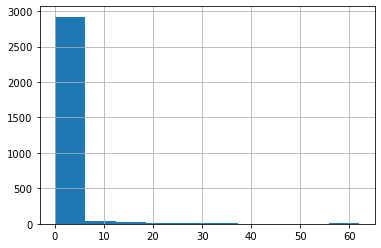

In [234]:
alice['RainfallTomorrow'].hist()

<AxesSubplot:>

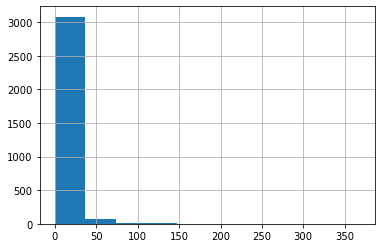

In [235]:
darwin['RainfallTomorrow'].hist()

<AxesSubplot:>

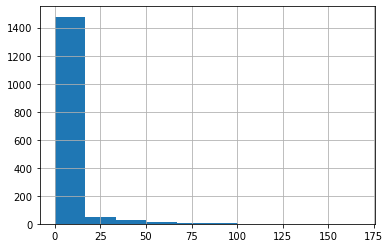

In [236]:
kath['RainfallTomorrow'].hist()

### ACF and PACF Plots

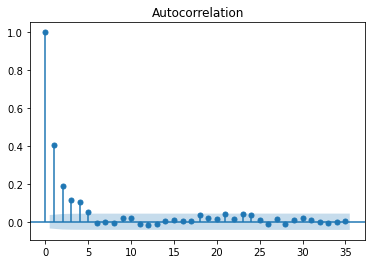

In [15]:
plot_acf(alice['RainfallTomorrow']);

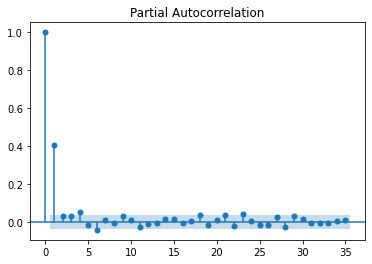

In [16]:
plot_pacf(alice['RainfallTomorrow']);

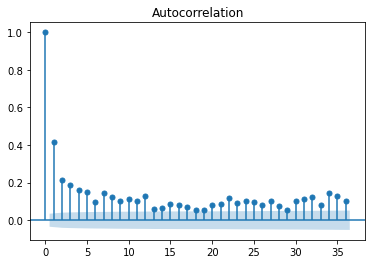

In [17]:
plot_acf(darwin['RainfallTomorrow']);

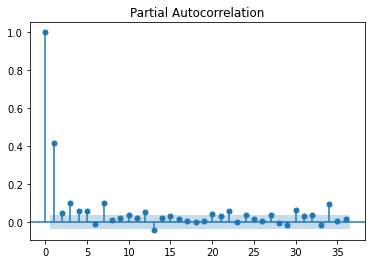

In [18]:
plot_pacf(darwin['RainfallTomorrow']);

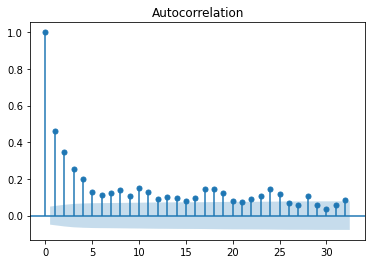

In [19]:
plot_acf(kath['RainfallTomorrow']);

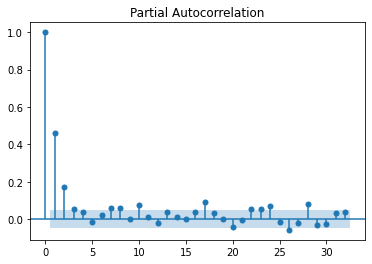

In [20]:
plot_pacf(kath['RainfallTomorrow']);

### ARIMA Exploration

In [237]:
kath1arima3 = pf.ARIMA(data=kath, ar=3, ma=3, integ=1, target='RainfallTomorrow')
kathfit1arima3 = kath1arima3.fit('MLE')
kathfit1arima3.bic

11872.384946772076

In [238]:
kath1arima2 = pf.ARIMA(data=kath, ar=5, ma=5, integ=0, target='RainfallTomorrow')
kathfit1arima2 = kath1arima2.fit('MLE')
kathfit1arima2.bic

11889.22742799869

In [239]:
# Katherine ARIMA Choice
kath1arima = pf.ARIMA(data=kath, ar=2, ma=6, integ=0, target='RainfallTomorrow')
kathfit1arima = kath1arima.fit('MLE')
kathfit1arima.bic

11875.193247553347

In [240]:
darwin1arima4 = pf.ARIMA(data=darwin, ar=2, ma=13, integ=0, target='RainfallTomorrow')
darwinfit1arima4 = darwin1arima4.fit('MLE')
darwinfit1arima4.bic

26260.394182878947

In [241]:
# Darwin ARIMA Choice
darwin1arima3 = pf.ARIMA(data=darwin, ar=2, ma=6, integ=0, target='RainfallTomorrow')
darwinfit1arima3 = darwin1arima3.fit('MLE')
darwinfit1arima3.bic

26302.163812975985

In [242]:
darwin1arima2 = pf.ARIMA(data=darwin, ar=2, ma=0, integ=1, target='RainfallTomorrow')
darwinfit1arima2 = darwin1arima2.fit('MLE')
darwinfit1arima2.bic

26797.35889325373

In [243]:
darwin1arima = pf.ARIMA(data=darwin, ar=2, ma=0, target='RainfallTomorrow')
darwinfit1arima = darwin1arima.fit('MLE')
darwinfit1arima.bic

26331.301809505127

In [244]:
# Alice ARIMA Choice
alice1arima3 = pf.ARIMA(data=alice, ar=2, ma=6, integ=0, target='RainfallTomorrow')
alicefit1arima3 = alice1arima3.fit('MLE')
alicefit1arima3.bic

17215.118703769458

In [245]:
alice1arima2 = pf.ARIMA(data=alice, ar=3, ma=6, integ=1, target='RainfallTomorrow')
alicefit1arima2 = alice1arima2.fit('MLE')
alicefit1arima2.bic

17230.727921750793

In [246]:
alice1arima = pf.ARIMA(data=alice, ar=3, ma=6, target='RainfallTomorrow')
alicefit1arima = alice1arima.fit('MLE')
alicefit1arima.bic

17221.939292891933

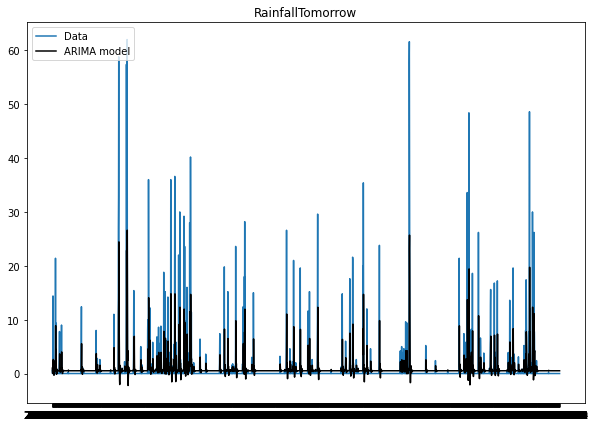

In [247]:
alice1arima.plot_fit()

In [248]:
alice1arima.predict_is(h=14, fit_once=False, fit_method='MLE')

Series
Date                
2017-06-11  0.516623
2017-06-12  0.515892
2017-06-13  0.516625
2017-06-14  0.515688
2017-06-15  0.516509
2017-06-16  0.515231
2017-06-17  0.515908
2017-06-18  0.515349
2017-06-19  0.514753
2017-06-20  0.514649
2017-06-21  0.514511
2017-06-22  0.513587
2017-06-23  0.515252
2017-06-24  0.514733

### ARIMAX Exogeneous Feature Selection

In [249]:
darwin.corr()

Rainfall  Evaporation  WindGustSpeed  Humidity9am  \
Rainfall             1.000000    -0.060805       0.308402     0.362105   
Evaporation         -0.060805     1.000000       0.134713    -0.404248   
WindGustSpeed        0.308402     0.134713       1.000000     0.009746   
Humidity9am          0.362105    -0.404248       0.009746     1.000000   
Pressure9am         -0.412022     0.317207      -0.196575    -0.612657   
Cloud9am             0.312997    -0.241077       0.139518     0.520275   
RainToday            0.509189    -0.262067       0.223637     0.507985   
AvgTemp             -0.141230    -0.006235      -0.093521     0.317025   
TempDiff            -0.258656     0.269394      -0.091682    -0.577121   
RainfallTomorrow     0.418407    -0.120273       0.331894     0.289858   
delta_Rainfall       0.539264     0.171679       0.087339     0.079366   
delta_Evaporation    0.051676     0.574777       0.102723    -0.052602   
delta_WindGustSpeed -0.021425     0.001974       0.545903     0.022767   
delta_Humidity9am    0.101441     0.076660      -0.065229     0.356266   
delta_Pressure9am   -0.039889    -0.009628      -0.006547     0.008899   
delta_Cloud9am       0.043673     0.117160       0.012899     0.094699   
delta_AvgTemp       -0.137613    -0.314881      -0.116350    -0.027769   
delta_TempDiff       0.104821    -0.088089       0.058344    -0.057245   

                     Pressure9am  Cloud9am  RainToday   AvgTemp  TempDiff  \
Rainfall               -0.412022  0.312997   0.509189 -0.141230 -0.258656   
Evaporation             0.317207 -0.241077  -0.262067 -0.006235  0.269394   
WindGustSpeed          -0.196575  0.139518   0.223637 -0.093521 -0.091682   
Humidity9am            -0.612657  0.520275   0.507985  0.317025 -0.577121   
Pressure9am             1.000000 -0.597753  -0.550635 -0.355681  0.698551   
Cloud9am               -0.597753  1.000000   0.461490  0.163399 -0.584949   
RainToday              -0.550635  0.461490   1.000000  0.024664 -0.366074   
AvgTemp                -0.355681  0.163399   0.024664  1.000000 -0.404746   
TempDiff                0.698551 -0.584949  -0.366074 -0.404746  1.000000   
RainfallTomorrow       -0.399557  0.272288   0.329716 -0.064927 -0.333090   
delta_Rainfall         -0.024399  0.042599   0.173851 -0.095346  0.018664   
delta_Evaporation       0.019335 -0.029005  -0.030524  0.005546 -0.004863   
delta_WindGustSpeed    -0.017031 -0.005092  -0.078135  0.047884 -0.063467   
delta_Humidity9am      -0.029093  0.100591   0.101409 -0.088484 -0.001483   
delta_Pressure9am       0.154939  0.028531   0.034737 -0.004847 -0.004686   
delta_Cloud9am         -0.008284  0.463806   0.044287 -0.041809 -0.071246   
delta_AvgTemp          -0.006389 -0.104072  -0.125312  0.277238  0.086831   
delta_TempDiff          0.018228 -0.080719   0.153093 -0.019115  0.355157   

                     RainfallTomorrow  delta_Rainfall  delta_Evaporation  \
Rainfall                     0.418407        0.539264           0.051676   
Evaporation                 -0.120273        0.171679           0.574777   
WindGustSpeed                0.331894        0.087339           0.102723   
Humidity9am                  0.289858        0.079366          -0.052602   
Pressure9am                 -0.399557       -0.024399           0.019335   
Cloud9am                     0.272288        0.042599          -0.029005   
RainToday                    0.329716        0.173851          -0.030524   
AvgTemp                     -0.064927       -0.095346           0.005546   
TempDiff                    -0.333090        0.018664          -0.004863   
RainfallTomorrow             1.000000        0.187713           0.003518   
delta_Rainfall               0.187713        1.000000           0.197276   
delta_Evaporation            0.003518        0.197276           1.000000   
delta_WindGustSpeed          0.165933        0.060063           0.095719   
delta_Humidity9am            0.053273        0.205332          -0.007405   
delta_Pres

In [93]:
alice.columns

Index(['Date', 'Location', 'Rainfall', 'Evaporation', 'WindGustDir',
       'WindGustSpeed', 'WindDir3pm', 'Humidity9am', 'Pressure9am', 'Cloud9am',
       'RainToday', 'RainTomorrow', 'State', 'AvgTemp', 'TempDiff',
       'RainfallTomorrow', 'delta_Rainfall', 'delta_Evaporation',
       'delta_WindGustSpeed', 'delta_Humidity9am', 'delta_Pressure9am',
       'delta_Cloud9am', 'delta_AvgTemp', 'delta_TempDiff'],
      dtype='object')

In [99]:
# Full 1st order predictors + Rainfall
alice5 = pf.ARIMAX(data=alice, formula='RainfallTomorrow~1+Rainfall+delta_Rainfall+delta_Evaporation+delta_WindGustSpeed+delta_Humidity9am+delta_Pressure9am+delta_Cloud9am+delta_AvgTemp+delta_TempDiff', ar=2, ma=6)
alicefit5 = alice5.fit('MLE')
alicefit5.summary()

Normal ARIMAX(2,0,6)                                                                                      
======================================================= ==================================================
Dependent Variable: RainfallTomorrow                    Method: MLE                                       
Start Date: 2008-12-07                                  Log Likelihood: -8452.1047                        
End Date: 2017-06-24                                    AIC: 16942.2094                                   
Number of observations: 3032                            BIC: 17056.532                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    0.2579     445782.066 0.0      1.0      (-873732.5919 | 873733.10
AR(2)                                

In [100]:
# Full 1st order predictors + RainToday
alice4 = pf.ARIMAX(data=alice, formula='RainfallTomorrow~1+RainToday+delta_Rainfall+delta_Evaporation+delta_WindGustSpeed+delta_Humidity9am+delta_Pressure9am+delta_Cloud9am+delta_AvgTemp+delta_TempDiff', ar=2, ma=6)
alicefit4 = alice4.fit('MLE')
alicefit4.summary()

Normal ARIMAX(2,0,6)                                                                                      
======================================================= ==================================================
Dependent Variable: RainfallTomorrow                    Method: MLE                                       
Start Date: 2008-12-07                                  Log Likelihood: -8445.0869                        
End Date: 2017-06-24                                    AIC: 16928.1738                                   
Number of observations: 3032                            BIC: 17042.4964                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    0.4608     169274.737 0.0      1.0      (-331778.0246 | 331778.94
AR(2)                                

In [101]:
# Full 1st order predictors
alice3 = pf.ARIMAX(data=alice, formula='RainfallTomorrow~1+delta_Rainfall+delta_Evaporation+delta_WindGustSpeed+delta_Humidity9am+delta_Pressure9am+delta_Cloud9am+delta_AvgTemp+delta_TempDiff', ar=2, ma=6)
alicefit3 = alice3.fit('MLE')
alicefit3.summary()

Normal ARIMAX(2,0,6)                                                                                      
======================================================= ==================================================
Dependent Variable: RainfallTomorrow                    Method: MLE                                       
Start Date: 2008-12-07                                  Log Likelihood: -8449.4199                        
End Date: 2017-06-24                                    AIC: 16934.8397                                   
Number of observations: 3032                            BIC: 17043.1453                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    0.4808     437461.431 0.0      1.0      (-857423.9254 | 857424.88
AR(2)                                

In [102]:
# Full 0-th order predictors
alice2 = pf.ARIMAX(data=alice, formula='RainfallTomorrow~1+Rainfall+Evaporation+WindGustSpeed+Humidity9am+Pressure9am+Cloud9am+RainToday+AvgTemp+TempDiff', ar=2, ma=6)
alicefit2 = alice2.fit('MLE')
alicefit2.summary()

Normal ARIMAX(2,0,6)                                                                                      
======================================================= ==================================================
Dependent Variable: RainfallTomorrow                    Method: MLE                                       
Start Date: 2008-12-07                                  Log Likelihood: -8451.4633                        
End Date: 2017-06-24                                    AIC: 16940.9266                                   
Number of observations: 3033                            BIC: 17055.2554                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    -0.0288    657774.299 -0.0     1.0      (-1289237.6564 | 1289237.
AR(2)                                

In [104]:
alice1 = pf.ARIMAX(data=alice, formula='RainfallTomorrow~1', ar=2, ma=6)
alicefit1 = alice1.fit('MLE')
alicefit1.summary()

Normal ARIMAX(2,0,6)                                                                                      
======================================================= ==================================================
Dependent Variable: RainfallTomorrow                    Method: MLE                                       
Start Date: 2008-12-07                                  Log Likelihood: -8567.4654                        
End Date: 2017-06-24                                    AIC: 17154.9308                                   
Number of observations: 3033                            BIC: 17215.1038                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    0.0025     0.2211     0.0113   0.991    (-0.4309 | 0.4359)       
AR(2)                                

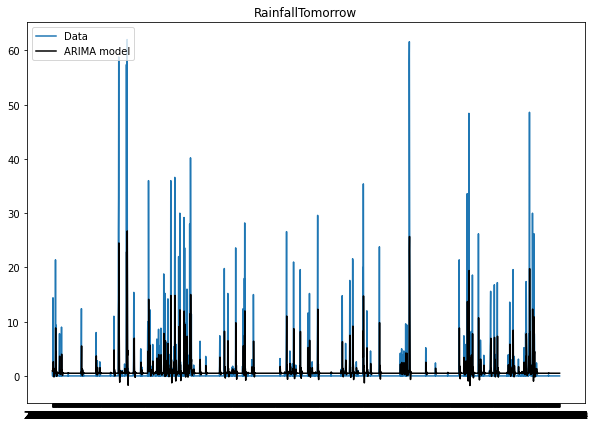

In [105]:
alice1.plot_fit()

In [106]:
alice1.predict_is(h=14, fit_once=False, fit_method='MLE')

RainfallTomorrow
Date                        
2017-06-11          0.500466
2017-06-12          0.500133
2017-06-13          0.500031
2017-06-14          0.499862
2017-06-15          0.499708
2017-06-16          0.499504
2017-06-17          0.499321
2017-06-18          0.499153
2017-06-19          0.498962
2017-06-20          0.498797
2017-06-21          0.498637
2017-06-22          0.498422
2017-06-23          0.498256
2017-06-24          0.498041

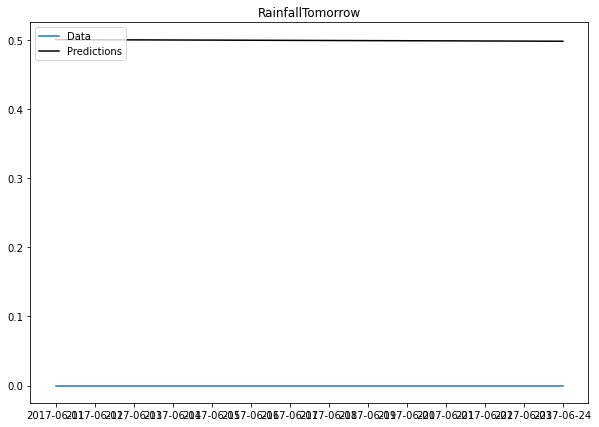

In [107]:
alice1.plot_predict_is(h=14, fit_once=False, fit_method='MLE')

## Stepwise

In [250]:
cor = data.corr()
cor[(cor > 0.4) | (cor < -0.4)]

Rainfall  Evaporation  WindGustSpeed  Humidity9am  \
Rainfall             1.000000          NaN            NaN          NaN   
Evaporation               NaN     1.000000            NaN    -0.520822   
WindGustSpeed             NaN          NaN       1.000000          NaN   
Humidity9am               NaN    -0.520822            NaN     1.000000   
Pressure9am               NaN          NaN            NaN          NaN   
Cloud9am                  NaN          NaN            NaN     0.444608   
RainToday            0.542137          NaN            NaN     0.488107   
AvgTemp                   NaN          NaN            NaN          NaN   
TempDiff                  NaN          NaN            NaN    -0.687214   
RainfallTomorrow     0.439486          NaN            NaN          NaN   
delta_Rainfall       0.529400          NaN            NaN          NaN   
delta_Evaporation         NaN          NaN            NaN          NaN   
delta_WindGustSpeed       NaN          NaN       0.547899          NaN   
delta_Humidity9am         NaN          NaN            NaN          NaN   
delta_Pressure9am         NaN          NaN            NaN          NaN   
delta_Cloud9am            NaN          NaN            NaN          NaN   
delta_AvgTemp             NaN          NaN            NaN          NaN   
delta_TempDiff            NaN          NaN            NaN          NaN   

                     Pressure9am  Cloud9am  RainToday   AvgTemp  TempDiff  \
Rainfall                     NaN       NaN   0.542137       NaN       NaN   
Evaporation                  NaN       NaN        NaN       NaN       NaN   
WindGustSpeed                NaN       NaN        NaN       NaN       NaN   
Humidity9am                  NaN  0.444608   0.488107       NaN -0.687214   
Pressure9am             1.000000       NaN        NaN -0.786807  0.465353   
Cloud9am                     NaN  1.000000   0.439049       NaN -0.583616   
RainToday                    NaN  0.439049   1.000000       NaN -0.411808   
AvgTemp                -0.786807       NaN        NaN  1.000000       NaN   
TempDiff                0.465353 -0.583616  -0.411808       NaN  1.000000   
RainfallTomorrow             NaN       NaN        NaN       NaN       NaN   
delta_Rainfall               NaN       NaN        NaN       NaN       NaN   
delta_Evaporation            NaN       NaN        NaN       NaN       NaN   
delta_WindGustSpeed          NaN       NaN        NaN       NaN       NaN   
delta_Humidity9am            NaN       NaN        NaN       NaN       NaN   
delta_Pressure9am            NaN       NaN        NaN       NaN       NaN   
delta_Cloud9am               NaN  0.427126        NaN       NaN       NaN   
delta_AvgTemp                NaN       NaN        NaN       NaN       NaN   
delta_TempDiff               NaN       NaN        NaN       NaN       NaN   

                     RainfallTomorrow  delta_Rainfall  delta_Evaporation  \
Rainfall                     0.439486          0.5294                NaN   
Evaporation                       NaN             NaN                NaN   
WindGustSpeed                     NaN             NaN                NaN   
Humidity9am                       NaN             NaN                NaN   
Pressure9am                       NaN             NaN                NaN   
Cloud9am                          NaN             NaN                NaN   
RainToday                         NaN             NaN                NaN   
AvgTemp                           NaN             NaN                NaN   
TempDiff                          NaN             NaN                NaN   
RainfallTomorrow             1.000000             NaN                NaN   
delta_Rainfall                    NaN          1.0000                NaN   
delta_Evaporation                 NaN             NaN                1.0   
delta_WindGustSpeed               NaN             NaN                NaN   
delta_Humidity9am                 NaN             NaN                NaN   
delta_Pres

In [252]:
# initialize dictionaries
vif_dict, tolerance_dict = {}, {}

def sklearn_vif(exogs, data):

        # form input data for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        X, y = data[not_exog], data[exog]

        # extract r-squared from the fit
        r_squared = LinearRegression().fit(X, y).score(X, y)

        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    return df_vif

In [253]:
data.isnull().sum()

Date                   0
Location               0
Rainfall               0
Evaporation            0
WindGustDir            0
WindGustSpeed          0
WindDir3pm             0
Humidity9am            0
Pressure9am            0
Cloud9am               0
RainToday              0
RainTomorrow           0
State                  0
AvgTemp                0
TempDiff               0
RainfallTomorrow       0
delta_Rainfall         3
delta_Evaporation      3
delta_WindGustSpeed    3
delta_Humidity9am      3
delta_Pressure9am      3
delta_Cloud9am         3
delta_AvgTemp          3
delta_TempDiff         3
dtype: int64

In [254]:
data2 = data.dropna(axis=0)

In [255]:
exogs_all = ['Rainfall', 'Evaporation', 'WindGustSpeed', 'Humidity9am', 'Pressure9am', 'Cloud9am', 'RainToday', 'AvgTemp', 'TempDiff', 'delta_Rainfall', 'delta_Evaporation', 'delta_WindGustSpeed', 'delta_Humidity9am', 'delta_Pressure9am', 'delta_Cloud9am', 'delta_AvgTemp', 'delta_TempDiff']

In [256]:
sklearn_vif(exogs_all, data2)

VIF  Tolerance
Rainfall             2.234876   0.447452
Evaporation          2.647213   0.377756
WindGustSpeed        1.928099   0.518646
Humidity9am          3.700965   0.270200
Pressure9am          4.669528   0.214154
Cloud9am             2.467765   0.405225
RainToday            1.962700   0.509502
AvgTemp              3.998579   0.250089
TempDiff             4.043353   0.247320
delta_Rainfall       1.658977   0.602781
delta_Evaporation    1.356166   0.737373
delta_WindGustSpeed  1.708483   0.585315
delta_Humidity9am    1.573968   0.635337
delta_Pressure9am    1.604595   0.623210
delta_Cloud9am       1.601727   0.624326
delta_AvgTemp        2.110292   0.473868
delta_TempDiff       1.561885   0.640252

### 0-th Order

In [14]:
alice2 = pf.ARIMAX(data=alice, formula='RainfallTomorrow~1+Rainfall+Evaporation+WindGustSpeed+Humidity9am+Pressure9am+Cloud9am+RainToday+AvgTemp+TempDiff', ar=2, ma=6)
alicefit2 = alice2.fit('MLE')
alicefit2.summary()

Normal ARIMAX(2,0,6)                                                                                      
======================================================= ==================================================
Dependent Variable: RainfallTomorrow                    Method: MLE                                       
Start Date: 2008-12-07                                  Log Likelihood: -8407.4382                        
End Date: 2017-06-24                                    AIC: 16852.8764                                   
Number of observations: 3033                            BIC: 16967.2052                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    -0.2564    49239.8206 -0.0     1.0      (-96510.3048 | 96509.7919
AR(2)                                

In [258]:
darwin.columns

Index(['Date', 'Location', 'Rainfall', 'Evaporation', 'WindGustDir',
       'WindGustSpeed', 'WindDir3pm', 'Humidity9am', 'Pressure9am', 'Cloud9am',
       'RainToday', 'RainTomorrow', 'State', 'AvgTemp', 'TempDiff',
       'RainfallTomorrow', 'delta_Rainfall', 'delta_Evaporation',
       'delta_WindGustSpeed', 'delta_Humidity9am', 'delta_Pressure9am',
       'delta_Cloud9am', 'delta_AvgTemp', 'delta_TempDiff'],
      dtype='object')

In [259]:
exogs_1storder = ['delta_Rainfall', 'delta_Evaporation',
       'delta_WindGustSpeed', 'delta_Humidity9am', 'delta_Pressure9am',
       'delta_Cloud9am', 'delta_AvgTemp', 'delta_TempDiff']

In [260]:
exogs_raw = ['Rainfall', 'Evaporation', 'WindGustSpeed', 'Humidity9am', 'Pressure9am', 'Cloud9am', 'RainToday', 'AvgTemp', 'TempDiff']

In [43]:
def arimax_stepwise_fwd(data, exog_cols):
    
    exogs = exog_cols.copy()
    formula = 'RainfallTomorrow~1'
    model = pf.ARIMAX(data=data, formula=formula, ar=2, ma=6)
    modelfit = model.fit('MLE')
    best_bic = modelfit.bic

    for i in range(len(exog_cols)):
        # print(i)
        BICs = []
        BIC_exogs = []
        for exog in exogs:
            formula_temp = formula + '+' + exog
            # print(formula_temp)
            model = pf.ARIMAX(data=data, formula=formula_temp, ar=2, ma=6)
            modelfit = model.fit('MLE')
            bic = modelfit.bic
            # print(bic)
            BICs.append(bic)
            BIC_exogs.append(exog)
        best_exog_bic = min(BICs)
        if best_exog_bic < best_bic:
            best_bic = best_exog_bic
            best_exog = BIC_exogs[np.argmin(BICs)]
            exogs.remove(best_exog)
            formula = formula + '+' + best_exog
        elif (not best_exog_bic < best_bic) or (i == len(exog_cols) - 1):
            print(best_bic)
            return formula

In [262]:
arimax_stepwise_fwd(darwin, exogs_raw)

25981.19186010056


'RainfallTomorrow~1+Pressure9am+AvgTemp'

In [263]:
arimax_stepwise_fwd(alice, exogs_raw)

16951.934279412842


'RainfallTomorrow~1+TempDiff+Pressure9am+Humidity9am+AvgTemp+WindGustSpeed+RainToday'

In [264]:
arimax_stepwise_fwd(kath, exogs_raw)

11732.128768516559


'RainfallTomorrow~1+Pressure9am+WindGustSpeed+AvgTemp+TempDiff'

### 1st Order

In [265]:
arimax_stepwise_fwd(darwin, exogs_1storder)

26058.606952328922


'RainfallTomorrow~1+delta_TempDiff+delta_AvgTemp'

In [266]:
arimax_stepwise_fwd(alice, exogs_1storder)

16983.922905295694


'RainfallTomorrow~1+delta_Humidity9am+delta_Pressure9am+delta_AvgTemp+delta_Cloud9am+delta_WindGustSpeed'

In [267]:
arimax_stepwise_fwd(kath, exogs_1storder)

11754.974495478782


'RainfallTomorrow~1+delta_AvgTemp+delta_Pressure9am+delta_TempDiff'

### Both 0-th and 1st Order

In [268]:
arimax_stepwise_fwd(darwin, exogs_all)

25755.80657741792


'RainfallTomorrow~1+Pressure9am+delta_WindGustSpeed+AvgTemp+delta_AvgTemp+delta_Pressure9am+delta_Evaporation+TempDiff+delta_TempDiff+RainToday'

In [44]:
arimax_stepwise_fwd(alice, exogs_all)

16943.75424375818


'RainfallTomorrow~1+TempDiff+delta_Pressure9am+delta_Humidity9am+WindGustSpeed+delta_AvgTemp+RainToday+Humidity9am+Pressure9am+Evaporation'

In [45]:
arimax_stepwise_fwd(kath, exogs_all)

11730.653747737046


'RainfallTomorrow~1+Pressure9am+WindGustSpeed+AvgTemp+TempDiff+delta_Pressure9am'

## Cross-Validation

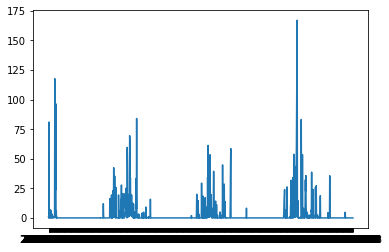

In [41]:
plt.plot(kath['RainfallTomorrow'][:-315])

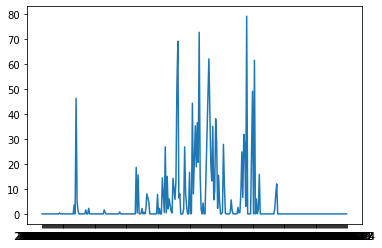

In [40]:
plt.plot(kath['RainfallTomorrow'][-315:])

In [42]:
kath.shape[0]*0.2*0.2

63.08000000000001

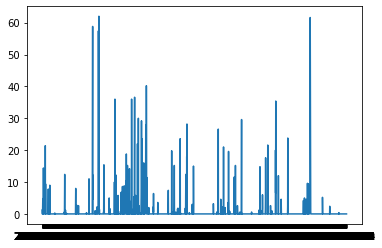

In [38]:
plt.plot(alice['RainfallTomorrow'][:-608])

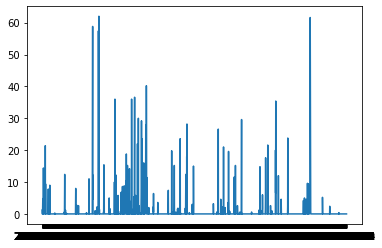

In [37]:
plt.plot(alice['RainfallTomorrow'][:-608])

In [43]:
alice.shape[0]*0.2*0.2

121.56000000000002

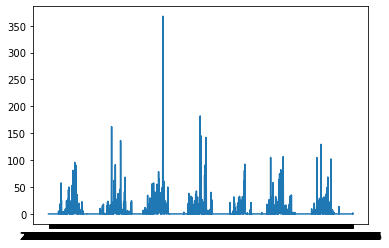

In [34]:
plt.plot(darwin['RainfallTomorrow'][:-638])

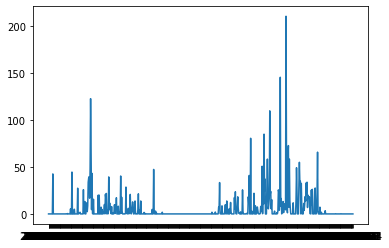

In [29]:
plt.plot(darwin['RainfallTomorrow'][-638:])

<AxesSubplot:>

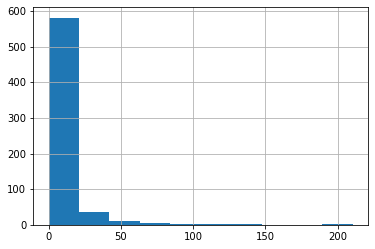

In [31]:
darwin['RainfallTomorrow'][-638:].hist()

In [20]:
darwin1, darwin2, darwin3, darwin4, darwin5 = np.array_split(darwin, 5)
darwin1.shape

(639, 24)

In [23]:
darwin1.iloc[-7:]['RainfallTomorrow']

Date
2010-03-25    12.4
2010-03-26     0.0
2010-03-27    23.6
2010-03-28     0.0
2010-03-29    19.0
2010-03-30    41.2
2010-03-31     0.0
Name: RainfallTomorrow, dtype: float64

In [24]:
darwin2.iloc[-7:]['RainfallTomorrow']

Date
2012-01-23     29.0
2012-01-24    182.2
2012-01-25     16.4
2012-01-26      3.6
2012-01-27      5.8
2012-01-28     33.4
2012-01-29     30.0
Name: RainfallTomorrow, dtype: float64

In [25]:
darwin3.iloc[-7:]['RainfallTomorrow']

Date
2013-12-20     0.0
2013-12-21    14.2
2013-12-22    28.0
2013-12-23     5.8
2013-12-24     8.2
2013-12-25    23.0
2013-12-26     9.0
Name: RainfallTomorrow, dtype: float64

In [26]:
darwin4.iloc[-7:]['RainfallTomorrow']

Date
2015-09-19    0.0
2015-09-20    0.0
2015-09-21    0.0
2015-09-22    0.0
2015-09-23    1.6
2015-09-24    1.8
2015-09-25    0.0
Name: RainfallTomorrow, dtype: float64

In [27]:
darwin5.iloc[-7:]['RainfallTomorrow']

Date
2017-06-18    0.0
2017-06-19    0.0
2017-06-20    0.0
2017-06-21    0.0
2017-06-22    0.0
2017-06-23    0.0
2017-06-24    0.0
Name: RainfallTomorrow, dtype: float64

In [83]:
formulas = (['RainfallTomorrow~1', 'RainfallTomorrow~1+Pressure9am+AvgTemp', 
             'RainfallTomorrow~1+TempDiff+Pressure9am+Humidity9am+AvgTemp+WindGustSpeed+RainToday', 
             'RainfallTomorrow~1+Pressure9am+WindGustSpeed+AvgTemp+TempDiff',
             'RainfallTomorrow~1+delta_TempDiff+delta_AvgTemp',
             'RainfallTomorrow~1+delta_Humidity9am+delta_Pressure9am+delta_AvgTemp+delta_Cloud9am+delta_WindGustSpeed',
             'RainfallTomorrow~1+delta_AvgTemp+delta_Pressure9am+delta_TempDiff',
             'RainfallTomorrow~1+Pressure9am+delta_WindGustSpeed+AvgTemp+delta_AvgTemp+delta_Pressure9am+delta_Evaporation+TempDiff+delta_TempDiff+RainToday', 
             'RainfallTomorrow~1+TempDiff+delta_Pressure9am+delta_Humidity9am+WindGustSpeed+delta_AvgTemp+RainToday+Humidity9am+Pressure9am+Evaporation', 
             'RainfallTomorrow~1+Pressure9am+WindGustSpeed+AvgTemp+TempDiff+delta_Pressure9am'])

In [93]:
cities = [darwin, alice, kath]

In [100]:
test = np.array_split(kath, 3)
test[0]

Date   Location  Rainfall  Evaporation WindGustDir  \
Date                                                                   
2013-03-01  2013-03-01  Katherine -0.253822    -0.874662         WNW   
2013-03-02  2013-03-02  Katherine -0.188828    -0.307633         WNW   
2013-03-03  2013-03-03  Katherine -0.253822    -0.921915           S   
2013-03-04  2013-03-04  Katherine  6.326746    -0.898289           W   
2013-03-05  2013-03-05  Katherine -0.253822    -0.874662          NW   
...                ...        ...       ...          ...         ...   
2014-08-04  2014-08-04  Katherine -0.253822     0.590164          SE   
2014-08-05  2014-08-05  Katherine -0.253822     0.779174         ESE   
2014-08-06  2014-08-06  Katherine -0.253822     0.070387           E   
2014-08-07  2014-08-07  Katherine -0.253822    -0.307633           E   
2014-08-08  2014-08-08  Katherine -0.253822    -0.260380         ESE   

            WindGustSpeed WindDir3pm  Humidity9am  Pressure9am  Cloud9am  ...  \
Date                                                                      ...   
2013-03-01       0.280639          W     0.779268    -1.018228  1.237617  ...   
2013-03-02      -1.415282         SW     1.395353    -0.999499  1.590596  ...   
2013-03-03       0.779439         SW     1.131317    -1.842282  0.884639  ...   
2013-03-04      -0.317921        WNW     1.703396    -1.654997  1.590596  ...   
2013-03-05      -1.016242        WNW     1.439359    -1.280427  1.237617  ...   
...                   ...        ...          ...          ...       ...  ...   
2014-08-04       0.280639        ESE    -1.399033     1.285378 -1.233232  ...   
2014-08-05       0.280639         SE    -1.685073     1.491391 -0.880254  ...   
2014-08-06       0.280639          E    -0.980976     0.892079 -1.233232  ...   
2014-08-07       0.280639          E     0.031164     0.779708 -1.233232  ...   
2014-08-08       0.978960          E     0.075170     0.817165 -1.233232  ...   

            TempDiff RainfallTomorrow delta_Rainfall  delta_Evaporation  \
Date                                                                      
2013-03-01 -0.612630              0.8            NaN                NaN   
2013-03-02 -1.407725              0.0   6.137292e-02           0.726198   
2013-03-03 -0.493366             81.0  -6.137292e-02          -0.786860   
2013-03-04 -0.314470              0.0   6.214008e+00           0.030191   
2013-03-05 -0.682201              0.0  -6.214008e+00           0.030191   
...              ...              ...            ...                ...   
2014-08-04  0.798662              0.0  -4.397736e-19           0.968288   
2014-08-05 -0.036187              0.0  -4.397736e-19           0.242020   
2014-08-06  1.494370              0.0  -4.397736e-19          -0.907905   
2014-08-07  1.116700              0.0  -4.397736e-19          -0.484248   
2014-08-08  0.818540              0.0  -4.397736e-19           0.060453   

            delta_WindGustSpeed  delta_Humidity9am  delta_Pressure9am  \
Date                                                                    
2013-03-01                  NaN                NaN                NaN   
2013-03-02            -1.545801           1.108211           0.055005   
2013-03-03             2.002748          -0.475092          -2.517071   
2013-03-04            -0.999870           1.029046           0.558237   
2013-03-05            -0.635916          -0.475092           1.117384   
...                         ...                ...                ...   
2014-08-04             0.364956          -0.514675           1.005555   
2014-08-05             0.001003          -0.514675           0.614152   
2014-08-06             0.001003           1.266541          -1.790180   
2014-08-07             0.001003           1.820697          -0.336398   
2014-08-08             0.637922           0.079064           0.110920   

            delta_Cloud9am  delta_AvgTemp  delta_TempDiff  
Date                                     

In [129]:
test = darwin.iloc[-5:]['RainfallTomorrow']
mean_absolute_percentage_error(test, test)

0.0

In [134]:
test2 = np.square(test + 2)
test2

Date
2017-06-20    4.0
2017-06-21    4.0
2017-06-22    4.0
2017-06-23    4.0
2017-06-24    4.0
Name: RainfallTomorrow, dtype: float64

In [138]:
np.mean(test2)

4.0

In [143]:
models = []
MAEs = []
MAPEs = []
PMs = []
R2s = []
EVars = []
MSEs = []

for i in range(len(formulas)):
    trues = pd.Series()
    preds = pd.Series()
    for city in cities:
        data = city
        datasplits = np.array_split(data, 5)
        for df in datasplits:
            n_test = floor(len(df)*0.2)
            model = pf.ARIMAX(data=df.iloc[:-n_test], formula=formulas[i], ar=2, ma=6)
            modelfit = model.fit('MLE')
            modelpred = model.predict(h=n_test, oos_data=df.iloc[-n_test:])
            trues = pd.concat([trues, df.iloc[-n_test:]['RainfallTomorrow']], ignore_index=True)
            preds = pd.concat([preds, modelpred['RainfallTomorrow']], ignore_index=True)
    
    models.append(i+1)
    
    mae_score = mean_absolute_error(trues, preds)
    MAEs.append(mae_score)
    
    mape_score = mean_absolute_percentage_error(trues+1, preds+1)
    MAPEs.append(mape_score)
    
    true_mean = np.mean(trues)
    pm_score = np.sum(np.square(trues - preds)) / np.sum(np.square(trues - true_mean))
    PMs.append(pm_score)
    
    R2_score = r2_score(trues, preds)
    R2s.append(R2_score)
    
    evar_score = explained_variance_score(trues, preds)
    EVars.append(evar_score)
    
    mse_score = mean_squared_error(trues, preds)
    MSEs.append(mse_score)

In [145]:
cvresult = pd.DataFrame({'Model': models, 'MAE Score': MAEs, 'MAPE Score': MAPEs, 'PM Score': PMs, 'R^2': R2s, 'Explained Variance': EVars, 'MSE': MSEs})
cvresult

Model  MAE Score  MAPE Score  PM Score       R^2  Explained Variance  \
0      1   4.509116    2.047788  0.962515  0.037485            0.039916   
1      2   4.855185    2.594592  0.869585  0.130415            0.138776   
2      3   4.486812    2.329581  0.767325  0.232675            0.234097   
3      4   4.469819    2.371736  0.754957  0.245043            0.246727   
4      5   4.799817    2.226498  1.003516 -0.003516           -0.003408   
5      6   4.582628    2.354699  0.805590  0.194410            0.195081   
6      7   5.089920    2.667096  0.953959  0.046041            0.046440   
7      8   4.810482    2.686407  0.788654  0.211346            0.215783   
8      9   4.963645    2.817817  0.853359  0.146641            0.150132   
9     10   4.749726    2.597863  0.825994  0.174006            0.181620   

          MSE  
0  134.391850  
1  121.416466  
2  107.138336  
3  105.411465  
4  140.116644  
5  112.481128  
6  133.197292  
7  110.116428  
8  119.150831  
9  115.329987

In [202]:
models2 = []
MAEs2 = []
MAPEs2 = []
PMs2 = []
R2s2 = []
EVars2 = []
MSEs2 = []

for i in range(len(formulas)):
    trues = pd.Series()
    preds = pd.Series()
    for city in cities:
        data = city
        datasplits = np.array_split(data, 5)
        for df in datasplits:
            n_test = floor(len(df)*0.2)
            model = pf.ARIMAX(data=df, formula=formulas[i], ar=2, ma=6)
            modelfit = model.fit('MLE')
            modelpred = model.predict_is(h=n_test, fit_once=False, fit_method='MLE')
            trues = pd.concat([trues, df.iloc[-n_test:]['RainfallTomorrow']], ignore_index=True)
            preds = pd.concat([preds, modelpred['RainfallTomorrow']], ignore_index=True)
    
    models2.append(i+1)
    
    mae_score = mean_absolute_error(trues, preds)
    MAEs2.append(mae_score)
    
    mape_score = mean_absolute_percentage_error(trues+1, preds+1)
    MAPEs2.append(mape_score)
    
    true_mean = np.mean(trues)
    pm_score = np.sum(np.square(trues - preds)) / np.sum(np.square(trues - true_mean))
    PMs2.append(pm_score)
    
    R2_score = r2_score(trues, preds)
    R2s2.append(R2_score)
    
    evar_score = explained_variance_score(trues, preds)
    EVars2.append(evar_score)
    
    mse_score = mean_squared_error(trues, preds)
    MSEs2.append(mse_score)

KeyboardInterrupt: 

In [ ]:
cvresult2 = pd.DataFrame({'Model': models2, 'MAE Score': MAEs2, 'MAPE Score': MAPEs2, 'PM Score': PMs2, 'R^2': R2s2, 'Explained Variance': EVars2, 'MSE': MSEs2})
cvresult2

In [229]:
models3 = []
MAEs3 = []
MAPEs3 = []
PMs3 = []
R2s3 = []
EVars3 = []
MSEs3 = []

for j in range(len(formulas)):
    trues2 = pd.Series()
    preds2 = pd.Series()
    for city2 in cities:
        data2 = city2
        datasplits2 = np.array_split(data2, 5)
        for df2 in datasplits2:
            n_test2 = 7
            model2 = pf.ARIMAX(data=df2, formula=formulas[j], ar=2, ma=6)
            modelfit2 = model2.fit('MLE')
            modelpred2 = model2.predict(h=n_test2, oos_data=df2.iloc[-n_test2:]).reset_index(drop=True)
            trues2 = pd.concat([trues2, df2.iloc[-n_test2:]['RainfallTomorrow']], ignore_index=True)
            preds2 = pd.concat([preds2, modelpred2['RainfallTomorrow']], ignore_index=True)
    
    models3.append(j+1)
    
    mae_score2 = mean_absolute_error(trues2, preds2)
    MAEs3.append(mae_score2)
    
    mape_score2 = mean_absolute_percentage_error(trues2+1, preds2+1)
    MAPEs3.append(mape_score2)
    
    true_mean2 = np.mean(trues2)
    pm_score2 = np.sum(np.square(trues2 - preds2)) / np.sum(np.square(trues2 - true_mean2))
    PMs3.append(pm_score2)
    
    R2_score2 = r2_score(trues2, preds2)
    R2s3.append(R2_score2)
    
    evar_score2 = explained_variance_score(trues2, preds2)
    EVars3.append(evar_score2)
    
    mse_score2 = mean_squared_error(trues2, preds2)
    MSEs3.append(mse_score2)
    
    print(formulas[j] + ' done')
    
    cvresult5 = pd.DataFrame({'Model': models3, 'MAE Score': MAEs3, 'MAPE Score': MAPEs3, 'PM Score': PMs3, 'R^2': R2s3, 'Explained Variance': EVars3, 'MSE': MSEs3})
    print(cvresult5)

RainfallTomorrow~1 done
   Model  MAE Score  MAPE Score  PM Score       R^2  Explained Variance  \
0      1   5.311155    1.781688  0.844675  0.155325             0.16309   

          MSE  
0  309.640348  
RainfallTomorrow~1+Pressure9am+AvgTemp done
   Model  MAE Score  MAPE Score  PM Score       R^2  Explained Variance  \
0      1   5.311155    1.781688  0.844675  0.155325            0.163090   
1      2   5.421989    2.159726  0.652126  0.347874            0.351229   

          MSE  
0  309.640348  
1  239.055755  
RainfallTomorrow~1+TempDiff+Pressure9am+Humidity9am+AvgTemp+WindGustSpeed+RainToday done
   Model  MAE Score  MAPE Score  PM Score       R^2  Explained Variance  \
0      1   5.311155    1.781688  0.844675  0.155325            0.163090   
1      2   5.421989    2.159726  0.652126  0.347874            0.351229   
2      3   5.382959    2.128401  0.593113  0.406887            0.408840   

          MSE  
0  309.640348  
1  239.055755  
2  217.422999  
RainfallTomorrow~1+Pr

In [230]:
cvresult5

Model  MAE Score  MAPE Score  PM Score       R^2  Explained Variance  \
0      1   5.311155    1.781688  0.844675  0.155325            0.163090   
1      2   5.421989    2.159726  0.652126  0.347874            0.351229   
2      3   5.382959    2.128401  0.593113  0.406887            0.408840   
3      4   5.084218    1.899438  0.585103  0.414897            0.419157   
4      5   4.960022    1.668742  0.703386  0.296614            0.299448   
5      6   6.037018    2.626102  0.636122  0.363878            0.371079   
6      7   5.865333    2.684022  0.612259  0.387741            0.388558   
7      8   5.157336    1.775999  0.554929  0.445071            0.445143   
8      9   5.205926    2.068685  0.588208  0.411792            0.416589   
9     10   4.991716    1.915693  0.557178  0.442822            0.447725   

          MSE  
0  309.640348  
1  239.055755  
2  217.422999  
3  214.486817  
4  257.846885  
5  233.189219  
6  224.441355  
7  203.425582  
8  215.625016  
9  204.250063

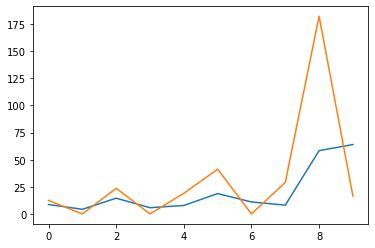

In [232]:
plt.plot(preds2[:10])
plt.plot(trues2[:10])

In [223]:
model2 = pf.ARIMAX(data=darwin4.iloc[:-7], formula=formulas[3], ar=2, ma=6)
modelfit2 = model2.fit('MLE')
modelpred2 = model2.predict(h=7, oos_data=darwin4.iloc[-7:]).reset_index(drop=True)
modelpred2

RainfallTomorrow
0         -0.123065
1          0.191325
2          0.133301
3          0.523685
4          0.054505
5          0.556761
6          0.562217

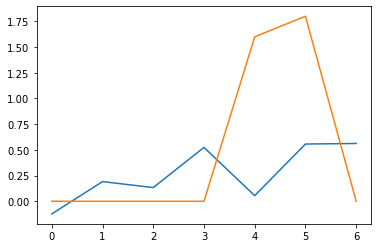

In [224]:
plt.plot(modelpred2)
plt.plot(darwin4.iloc[-7:]['RainfallTomorrow'].reset_index(drop=True))

In [209]:
df2.iloc[:-(n_test2-d)]

Date Location  Rainfall  Evaporation WindGustDir  \
Date                                                                 
2008-07-01  2008-07-01   Darwin -0.253822    -0.780157           E   
2008-07-02  2008-07-02   Darwin -0.253822    -0.402138         ENE   
2008-07-03  2008-07-03   Darwin -0.253822     0.070387           E   
2008-07-04  2008-07-04   Darwin -0.253822    -0.165875           E   
2008-07-05  2008-07-05   Darwin -0.253822    -0.165875         ESE   
...                ...      ...       ...          ...         ...   
2010-03-20  2010-03-20   Darwin  0.477353    -0.354885         ENE   
2010-03-21  2010-03-21   Darwin -0.253822    -0.874662         ENE   
2010-03-22  2010-03-22   Darwin -0.075090    -0.638400         ESE   
2010-03-23  2010-03-23   Darwin -0.253822    -0.449390         ESE   
2010-03-24  2010-03-24   Darwin  1.306017    -0.496643           E   

            WindGustSpeed WindDir3pm  Humidity9am  Pressure9am  Cloud9am  ...  \
Date                                                                      ...   
2008-07-01       0.081119        SSE     1.087310     0.386410 -0.880254  ...   
2008-07-02       0.978960          E     1.087310     0.536238 -0.880254  ...   
2008-07-03       0.579919        ENE    -0.804951     0.611152 -1.233232  ...   
2008-07-04       0.380399          E    -0.056848     0.629880 -0.527275  ...   
2008-07-05       0.579919          E    -0.848957     0.442595 -0.880254  ...   
...                   ...        ...          ...          ...       ...  ...   
2010-03-20      -1.016242        WNW     1.219329    -0.587472  1.237617  ...   
2010-03-21      -1.016242          N     0.735262    -0.737300  1.237617  ...   
2010-03-22      -0.517441        WNW     0.603244    -0.849671  1.237617  ...   
2010-03-23       1.178480        WSW     0.823274    -1.036956  1.237617  ...   
2010-03-24       0.280639        WNW     0.955292    -0.943314  0.884639  ...   

            TempDiff RainfallTomorrow delta_Rainfall  delta_Evaporation  \
Date                                                                      
2008-07-01  0.023445              0.0            NaN                NaN   
2008-07-02  0.003568              0.0  -4.397736e-19           0.484109   
2008-07-03  0.122832              0.0  -4.397736e-19           0.605154   
2008-07-04  0.083077              0.0  -4.397736e-19          -0.302681   
2008-07-05  0.460747              0.0  -4.397736e-19          -0.000070   
...              ...              ...            ...                ...   
2010-03-20 -1.049932              0.0   6.904453e-01          -0.242159   
2010-03-21 -1.248706              2.2  -6.904453e-01          -0.665815   
2010-03-22 -0.930668              0.0   1.687755e-01           0.302542   
2010-03-23 -0.930668             19.2  -1.687755e-01           0.242020   
2010-03-24 -0.771649             10.8   1.472950e+00          -0.060592   

            delta_WindGustSpeed  delta_Humidity9am  delta_Pressure9am  \
Date                                                                    
2008-07-01                  NaN                NaN                NaN   
2008-07-02             0.819898          -0.000101           0.446408   
2008-07-03            -0.362951          -3.404203           0.222749   
2008-07-04            -0.180974           1.345706           0.055005   
2008-07-05             0.182979          -1.425074          -0.560057   
...                         ...                ...                ...   
2010-03-20            -2.455685           1.029046           0.110920   
2010-03-21             0.001003          -0.870918          -0.448227   
2010-03-22             0.455945          -0.237597          -0.336398   
2010-03-23             1.547806           0.395724          -0.560057   
2010-03-24            -0.817893           0.237394           0.278664   

            delta_Cloud9am  delta_AvgTemp  delta_TempDiff  
Date                                                       
2008-07

In [208]:
pd.DataFrame(df2.iloc[-7, :])

2010-03-25
Date                         2010-03-25
Location                         Darwin
Rainfall                       0.623587
Evaporation                   -0.921915
WindGustDir                         ESE
WindGustSpeed                   1.67728
WindDir3pm                          ENE
Humidity9am                    0.999298
Pressure9am                   -0.943314
Cloud9am                       0.884639
RainToday                      2.156336
RainTomorrow                        Yes
State                Northern Territory
AvgTemp                        0.613025
TempDiff                      -1.089687
RainfallTomorrow                   12.4
delta_Rainfall                -0.644416
delta_Evaporation             -0.544771
delta_WindGustSpeed            1.274841
delta_Humidity9am              0.079064
delta_Pressure9am              -0.00091
delta_Cloud9am                -0.000056
delta_AvgTemp                  0.066862
delta_TempDiff                -0.489283

In [149]:
formulas[2]

'RainfallTomorrow~1+TempDiff+Pressure9am+Humidity9am+AvgTemp+WindGustSpeed+RainToday'

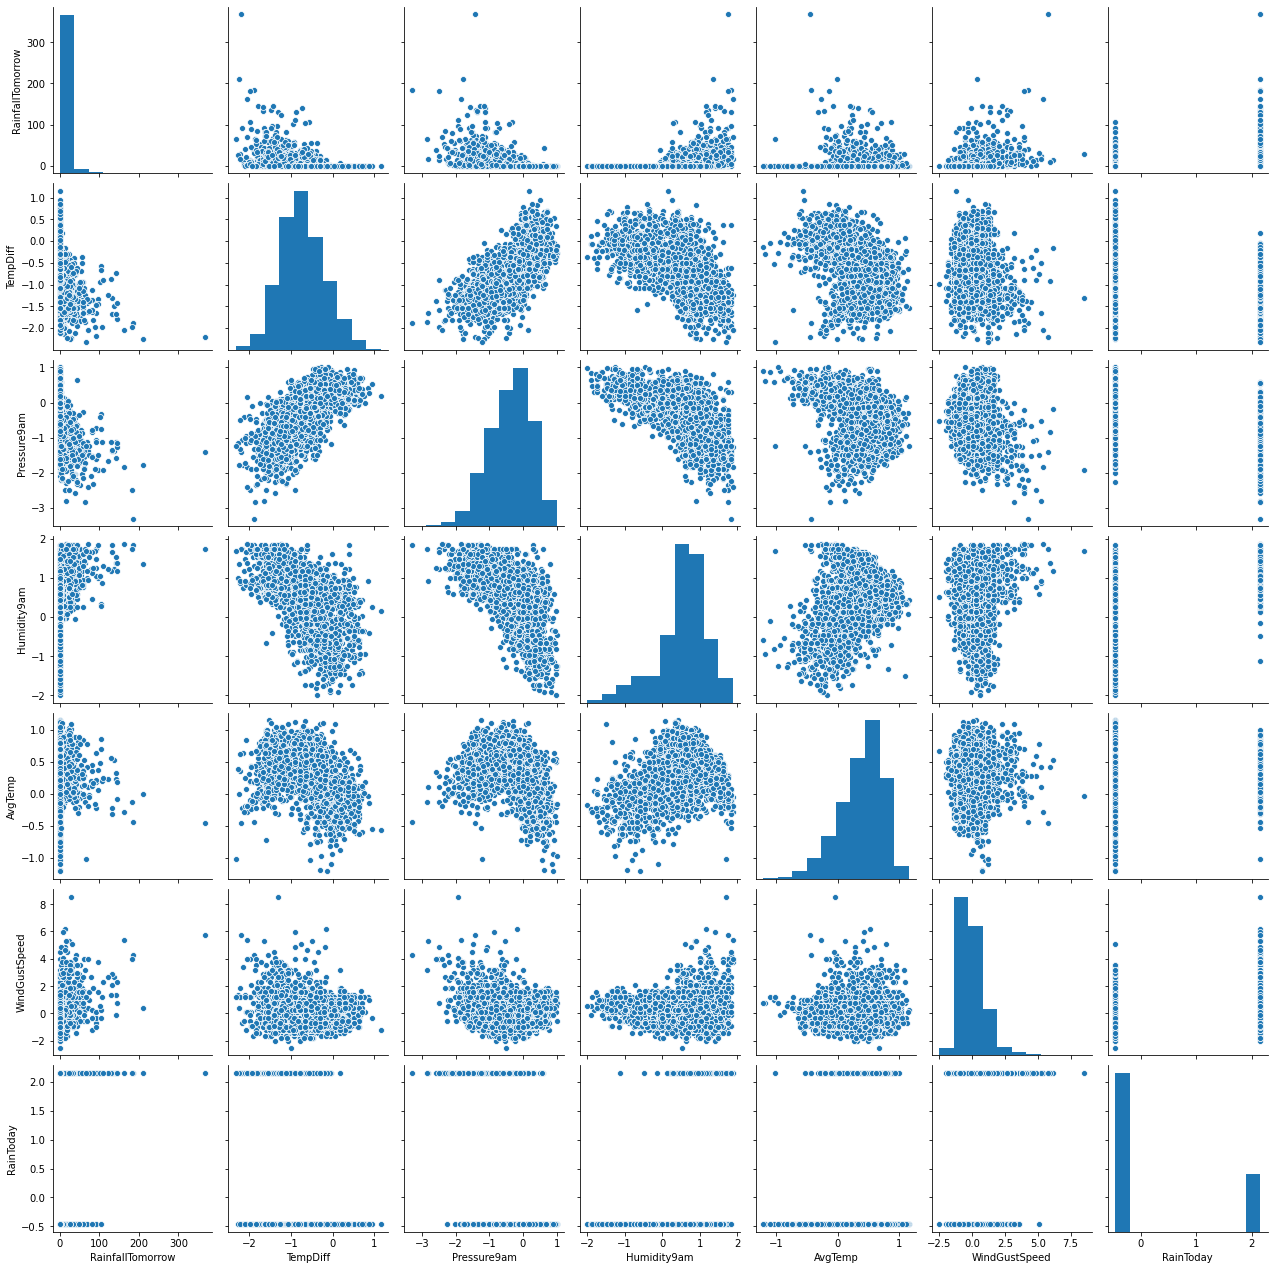

In [173]:
sns.pairplot(data[['RainfallTomorrow', 'TempDiff', 'Pressure9am', 'Humidity9am', 'AvgTemp', 'WindGustSpeed', 'RainToday']])

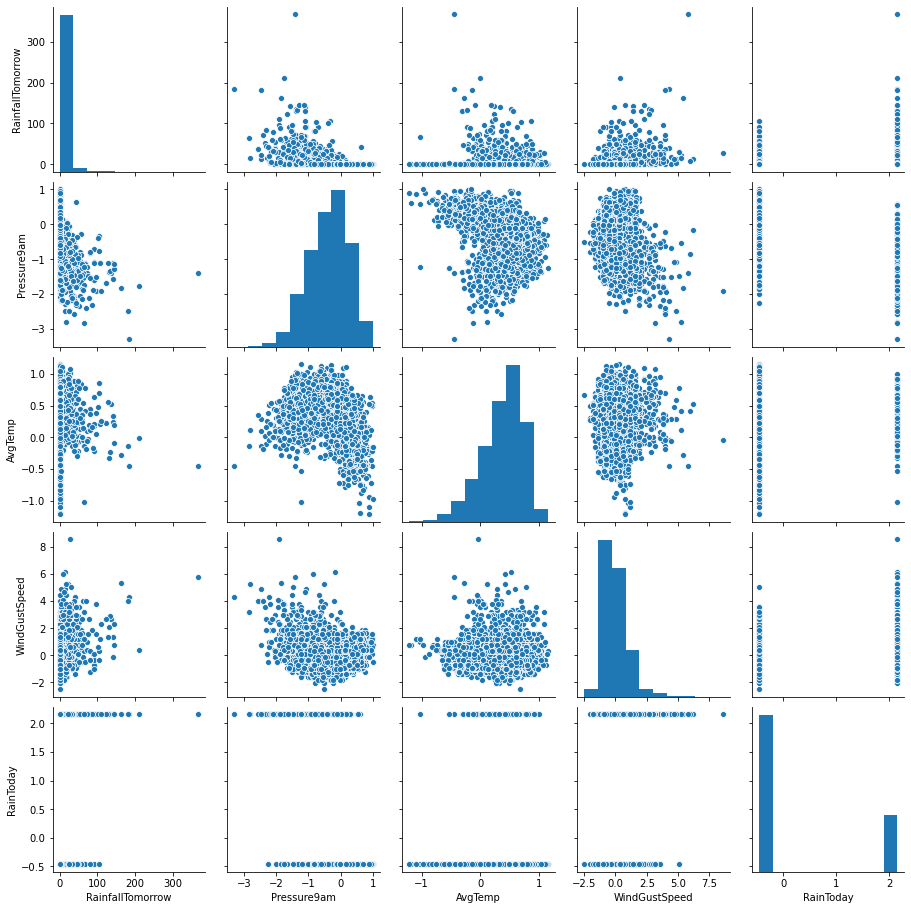

In [175]:
sns.pairplot(data[['RainfallTomorrow', 'Pressure9am', 'AvgTemp', 'WindGustSpeed', 'RainToday']])

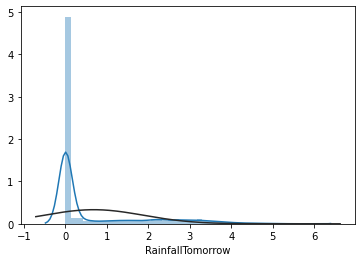

<Figure size 432x288 with 0 Axes>

In [166]:
log_Rainfall = data.dropna(axis=0)['RainfallTomorrow']
sns.distplot(np.log(log_Rainfall+1), fit=norm)
fig = plt.figure()

<AxesSubplot:>

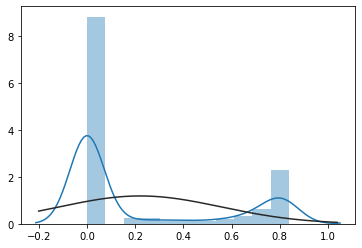

In [170]:
rainfalltmr2, boxcoxalpha = boxcox(data['RainfallTomorrow']+1)
sns.distplot(rainfalltmr2, fit=norm)

In [188]:
np.unique(rainfalltmr2, return_counts=True)

(array([0.        , 0.16387266, 0.27718833, 0.35985341, 0.42261278,
        0.47175467, 0.51119377, 0.54348907, 0.57038092, 0.5930924 ,
        0.61250711, 0.62927861, 0.64390026, 0.65675119, 0.6681273 ,
        0.6782628 , 0.68734535, 0.69552705, 0.70293238, 0.70966415,
        0.71580803, 0.72143592, 0.72660859, 0.73137775, 0.73578767,
        0.73987644, 0.74367702, 0.74721807, 0.75052462, 0.75361862,
        0.7565194 , 0.75924405, 0.76180771, 0.76422388, 0.7665046 ,
        0.76866064, 0.7707017 , 0.77263648, 0.77447287, 0.77621798,
        0.77787827, 0.77945962, 0.78096737, 0.78240642, 0.78378122,
        0.78509587, 0.78635413, 0.78755945, 0.78871501, 0.78982376,
        0.79088839, 0.79191143, 0.7928952 , 0.79384185, 0.79475339,
        0.79563169, 0.79647848, 0.79729537, 0.79808389, 0.79884545,
        0.79958137, 0.80029288, 0.80098114, 0.80164726, 0.80229224,
        0.80291706, 0.80352261, 0.80410976, 0.8046793 , 0.80523199,
        0.80576855, 0.80628965, 0.80679594, 0.80

In [196]:
pd.Series(rainfalltmr2).rename('BoxcoxRainfall')

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3187    0.0
3188    0.0
3189    0.0
3190    0.0
3191    0.0
Name: BoxcoxRainfall, Length: 3192, dtype: float64

In [197]:
data['TempDiff'].reset_index(drop=True)

0       0.023445
1       0.003568
2       0.122832
3       0.083077
4       0.460747
          ...   
3187    0.222219
3188   -0.314470
3189   -0.175328
3190   -0.135574
3191   -0.294593
Name: TempDiff, Length: 3192, dtype: float64

In [198]:
pd.concat([pd.Series(rainfalltmr2).rename('BoxcoxRainfall').value_counts(dropna=False), data['TempDiff'].reset_index(drop=True)], axis=1)

BoxcoxRainfall  TempDiff
0.000000             2146.0  0.023445
0.163873               61.0       NaN
0.277188               56.0       NaN
0.359853               33.0       NaN
0.422613               26.0       NaN
...                     ...       ...
3187.000000             NaN  0.222219
3188.000000             NaN -0.314470
3189.000000             NaN -0.175328
3190.000000             NaN -0.135574
3191.000000             NaN -0.294593

[3445 rows x 2 columns]

In [200]:
dataslice2 = pd.concat([pd.Series(rainfalltmr2).rename('BoxcoxRainfall').reset_index(drop=True), data[['TempDiff', 'Pressure9am', 'Humidity9am', 'AvgTemp', 'WindGustSpeed', 'RainToday']].reset_index(drop=True)], axis=1)
dataslice2

BoxcoxRainfall  TempDiff  Pressure9am  Humidity9am   AvgTemp  \
0                0.0  0.023445     0.386410     1.087310  0.237854   
1                0.0  0.003568     0.536238     1.087310  0.112797   
2                0.0  0.122832     0.611152    -0.804951  0.001139   
3                0.0  0.083077     0.629880    -0.056848 -0.284706   
4                0.0  0.460747     0.442595    -0.848957 -0.329369   
...              ...       ...          ...          ...       ...   
3187             0.0  0.222219    -0.006889     0.295201  0.179791   
3188             0.0 -0.314470     0.124211    -0.012842  0.228921   
3189             0.0 -0.175328     0.255310    -0.452903  0.219988   
3190             0.0 -0.135574     0.180396     0.251195 -0.007794   
3191             0.0 -0.294593    -0.006889     0.735262  0.126196   

      WindGustSpeed  RainToday  
0          0.081119   -0.46375  
1          0.978960   -0.46375  
2          0.579919   -0.46375  
3          0.380399   -0.46375  
4          0.579919   -0.46375  
...             ...        ...  
3187      -0.517441   -0.46375  
3188      -0.317921   -0.46375  
3189      -0.716962   -0.46375  
3190      -1.415282   -0.46375  
3191      -1.016242   -0.46375  

[3192 rows x 7 columns]

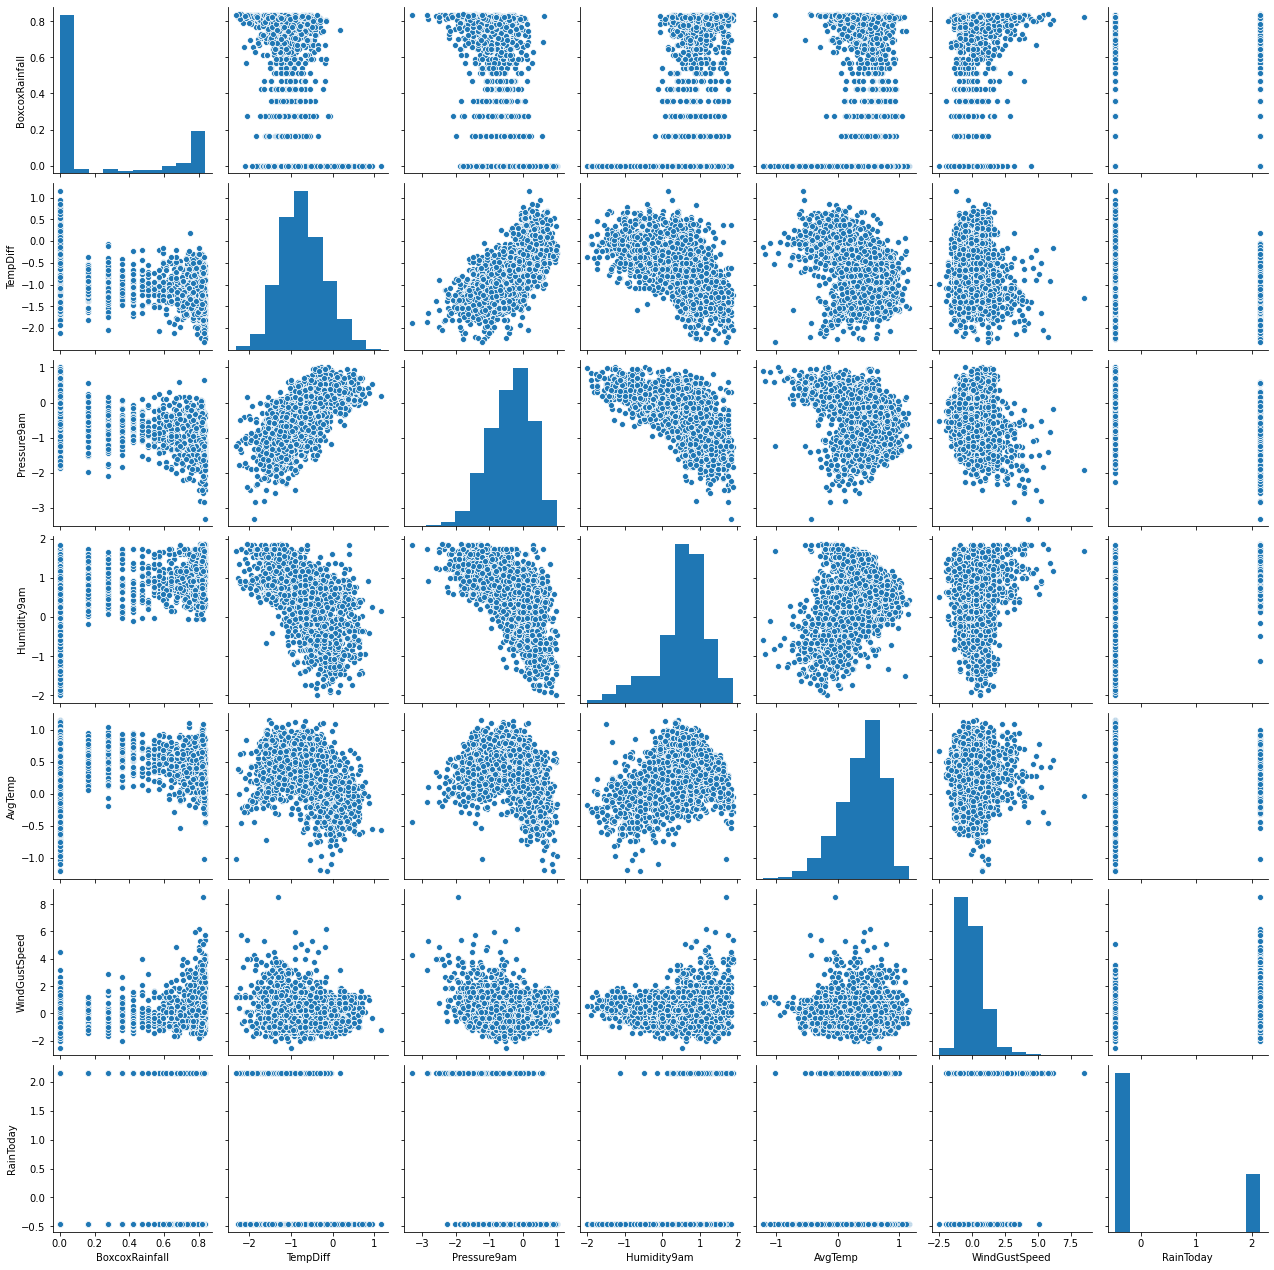

In [201]:
sns.pairplot(dataslice2)

In [44]:
darwin1_model1 = pf.ARIMAX(data=darwin1.iloc[:-7], formula='RainfallTomorrow~1+Pressure9am+AvgTemp', ar=2, ma=6)
darwin1_model1fit = darwin1_model1.fit('MLE')
print(darwin1_model1fit.bic)
darwin1_model1pred = darwin1_model1.predict(h=7, oos_data=darwin1.iloc[-7:])
darwin1_model1pred['RainfallTomorrow']

5081.97594763331


Date
2010-03-18     8.048836
2010-03-19     9.850869
2010-03-20    10.068015
2010-03-21    13.254427
2010-03-22     8.628648
2010-03-23    12.282241
2010-03-24    14.660649
Name: RainfallTomorrow, dtype: float64

In [127]:
df = pd.Series()
df = pd.concat([df, darwin1_model1pred['RainfallTomorrow']], ignore_index=True)
df = pd.concat([df, darwin1_model1pred['RainfallTomorrow'][:5]], ignore_index=True)
# df = pd.concat([df['RainfallTomorrow'], darwin.iloc[-5:]['RainfallTomorrow']], ignore_index=True)
df

0      8.048836
1      9.850869
2     10.068015
3     13.254427
4      8.628648
5     12.282241
6     14.660649
7      8.048836
8      9.850869
9     10.068015
10    13.254427
11     8.628648
dtype: float64

In [36]:
r2_score(darwin1.iloc[-7:]['RainfallTomorrow'], darwin1_model1pred['RainfallTomorrow'])

-0.12881366300974806

In [37]:
mean_absolute_error(darwin1.iloc[-7:]['RainfallTomorrow'], darwin1_model1pred['RainfallTomorrow'])

13.562600645884958

In [38]:
mean_absolute_percentage_error(darwin1.iloc[-7:]['RainfallTomorrow'], darwin1_model1pred['RainfallTomorrow'])

2.4297527979152356e+16

### ARIMAX Example

In [13]:
testdata = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/MASS/drivers.csv")
testdata.index = testdata['time'];
testdata = testdata.rename(columns={'value': 'drivers'})
testdata.loc[(testdata['time']>=1983.05), 'seat_belt'] = 1;
testdata.loc[(testdata['time']<1983.05), 'seat_belt'] = 0;
testdata.loc[(testdata['time']>=1974.00), 'oil_crisis'] = 1;
testdata.loc[(testdata['time']<1974.00), 'oil_crisis'] = 0;
testdata

Unnamed: 0         time  drivers  seat_belt  oil_crisis
time                                                                
1969.000000           1  1969.000000     1687        0.0         0.0
1969.083333           2  1969.083333     1508        0.0         0.0
1969.166667           3  1969.166667     1507        0.0         0.0
1969.250000           4  1969.250000     1385        0.0         0.0
1969.333333           5  1969.333333     1632        0.0         0.0
...                 ...          ...      ...        ...         ...
1984.583333         188  1984.583333     1284        1.0         1.0
1984.666667         189  1984.666667     1444        1.0         1.0
1984.750000         190  1984.750000     1575        1.0         1.0
1984.833333         191  1984.833333     1737        1.0         1.0
1984.916667         192  1984.916667     1763        1.0         1.0

[192 rows x 5 columns]

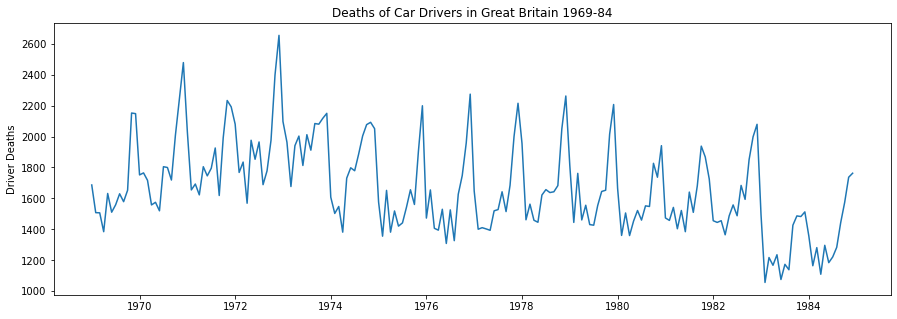

In [42]:
plt.figure(figsize=(15,5));
plt.plot(testdata.index,testdata['drivers']);
plt.ylabel('Driver Deaths');
plt.title('Deaths of Car Drivers in Great Britain 1969-84');
plt.plot();

In [15]:
model = pf.ARIMAX(data=testdata, formula='drivers~1+seat_belt+oil_crisis',
                  ar=1, ma=1, family=pf.Normal())
x = model.fit("MLE")
x.summary()

Normal ARIMAX(1,0,1)                                                                                      
======================================================= ==================================================
Dependent Variable: drivers                             Method: MLE                                       
Start Date: 1969.08333333333                            Log Likelihood: -1277.0076                        
End Date: 1984.91666666667                              AIC: 2566.0151                                    
Number of observations: 191                             BIC: 2585.5288                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    0.4491     0.0988     4.5455   0.0      (0.2554 | 0.6427)        
MA(1)                                

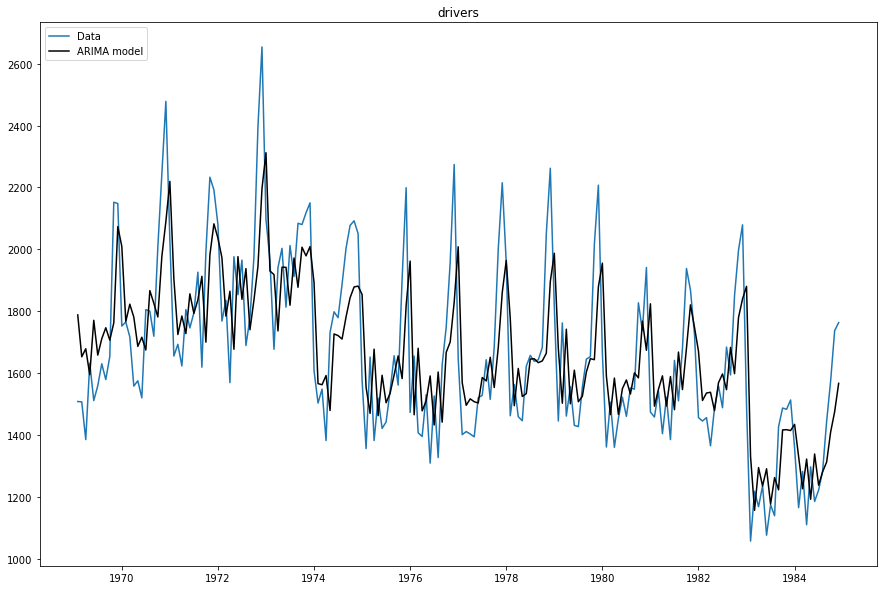

In [45]:
model.plot_fit(figsize=(15,10))

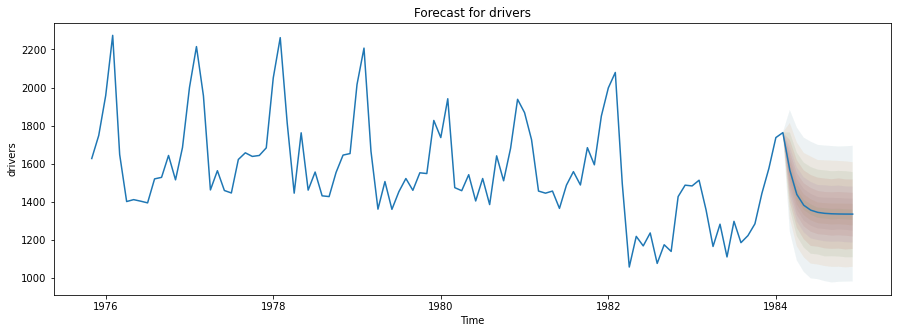

In [16]:
model.plot_predict(h=10, oos_data=testdata.iloc[-10:], past_values=100, figsize=(15,5))

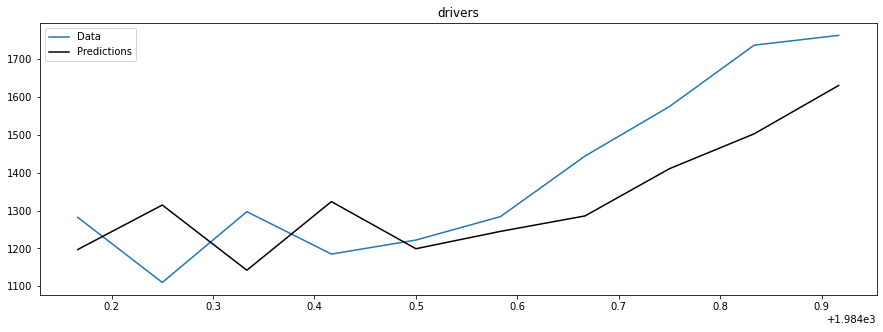

In [17]:
model.plot_predict_is(h=10, fit_once=False, fit_method='MLE', figsize=(15,5))

In [19]:
model.predict(h=10, oos_data=testdata.iloc[-10:], intervals=True)

drivers  1% Prediction Interval  5% Prediction Interval  \
time                                                                       
1984.166667  1565.577030             1116.127046             1243.878472   
1984.250000  1438.426243              935.446951             1085.993116   
1984.333333  1381.325239              876.548375             1023.041662   
1984.416667  1355.682263              855.802291             1001.506856   
1984.500000  1344.166489              845.363285              983.150308   
1984.583333  1338.994974              845.085373              983.776645   
1984.666667  1336.672544              836.660506              981.186312   
1984.750000  1335.629585              840.958422              981.095491   
1984.833333  1335.161212              823.910134              979.357852   
1984.916667  1334.950875              837.850763              979.167888   

             95% Prediction Interval  99% Prediction Interval  
time                                                           
1984.166667              1881.404515              2021.563339  
1984.250000              1782.300403              1923.079682  
1984.333333              1735.925716              1889.412157  
1984.416667              1715.491665              1868.184311  
1984.500000              1702.499242              1843.819289  
1984.583333              1691.872930              1842.131492  
1984.666667              1691.513488              1838.969828  
1984.750000              1686.872010              1847.097090  
1984.833333              1691.789887              1833.956707  
1984.916667              1692.339424              1840.377067

In [18]:
model.predict_is(h=10, fit_once=True, fit_method='MLE', figsize=(15,5))

drivers
time                    
1984.166667  1197.021074
1984.250000  1292.191944
1984.333333  1163.190023
1984.416667  1308.804685
1984.500000  1207.235118
1984.583333  1252.019051
1984.666667  1281.907784
1984.750000  1377.036747
1984.833333  1440.082710
1984.916667  1529.514931

In [60]:
testdata['drivers'].dtype, testdata['seat_belt'].dtype, testdata['oil_crisis'].dtype

(dtype('int64'), dtype('float64'), dtype('float64'))

In [61]:
data['RainfallTomorrow'].dtype

dtype('float64')